  <h1 style="color: #00E676;">Cars 4 You - Machine Learning Projects</h1>

Group: 39
- **Name**: Afonso Pereira **number**: 20250342
- **Name**: Daniel Ribeiro, **number**: 20250376
- **Name**: Pedro Rei, **number**: 20250389
- **Name**: Tomás Boavista, **number**: 20250491

Cars 4 You is a car re-sale platform that buys vehicles from private owners and resells them at a profit. It gathers data online and sends vehicles for mechanical inspection. As the business has grown, inspection backlogs have led potential customers to turn to competitors. To ease this bottleneck, the company has requested the development of a predictive model that estimates a car’s price from the information provided by the user—without requiring an immediate inspection.

  <h1 style="color: #00E676;">Imported Libraries</h1>

In [1]:
#!pip install rapidfuzz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from sklearn.preprocessing import MinMaxScaler
from rapidfuzz import process, fuzz
import re, unicodedata

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import r_regression
from sklearn.model_selection import KFold
import numpy as np


The standard set of essential libraries (numpy, pandas, matplotlib.pyplot, seaborn) was imported.

  <h1 style="color: #00E676;">Import Datasets</h1>

In [52]:
df_train = pd.read_csv("data/train.csv")
print(f"The dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")

The dataset has 75973 rows and 14 columns


In [53]:
df_test = pd.read_csv("data/test.csv")
print(f"The dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns")

The dataset has 32567 rows and 13 columns


<table style="width:100%; font-size:12px; border-collapse: collapse;">
  <thead>
    <tr style="background-color:#f2f2f2; text-align:left;">
      <th style="border:1px solid #ddd;">Variable</th>
      <th style="border:1px solid #ddd;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="border:1px solid #ddd;">carID </td><td style="border:1px solid #ddd;">An attribute that contains an identifier for each car</td></tr>
    <tr><td style="border:1px solid #ddd;">Brand</td><td style="border:1px solid #ddd;">The car’s main brand (e.g. Ford, Toyota)</td></tr>
    <tr><td style="border:1px solid #ddd;">model</td><td style="border:1px solid #ddd;">The car model</td></tr>
    <tr><td style="border:1px solid #ddd;">year</td><td style="border:1px solid #ddd;">The year of Registration of the Car</td></tr>
    <tr><td style="border:1px solid #ddd;">mileage</td><td style="border:1px solid #ddd;">The total reported distance travelled by the car (in miles)</td></tr>
    <tr><td style="border:1px solid #ddd;">tax</td><td style="border:1px solid #ddd;">The amount of road tax (in £) that, in 2020, was
applicable to the car in question.</td></tr>
    <tr><td style="border:1px solid #ddd;">fuelType</td><td style="border:1px solid #ddd;">Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)</td></tr>
    <tr><td style="border:1px solid #ddd;">mpg</td><td style="border:1px solid #ddd;">Average Miles per Gallon</td></tr>
    <tr><td style="border:1px solid #ddd;">engineSize</td><td style="border:1px solid #ddd;">Size of Engine in liters (Cubic Decimeters)</td></tr>
    <tr><td style="border:1px solid #ddd;">paintQuality%</td><td style="border:1px solid #ddd;">The mechanic’s assessment of the cars’ overall paint
quality and hull integrity (filled by the mechanic during evaluation).</td></tr>
    <tr><td style="border:1px solid #ddd;">previousOwners</td><td style="border:1px solid #ddd;">Number of previous registered owners of the vehicle.</td></tr>
    <tr><td style="border:1px solid #ddd;">hasDamage</td><td style="border:1px solid #ddd;">Boolean marker filled by the seller at the time of
registration stating whether the car is damaged or not.</td></tr>
    <tr><td style="border:1px solid #ddd;">price</td><td style="border:1px solid #ddd;">The car’s price when purchased by Cars 4 You (in £).</td></tr>
  </tbody>
</table>

  <h1 style="color: #00E676;">1. Initial Data Inspection</h1>

In [6]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [7]:
df_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [9]:
pct_missing = (df_train.isna().mean() * 100).round(2)
pct_missing_str = pct_missing.map(lambda x: f"{x:.2f}%")
pct_missing_str

carID              0.00%
Brand              2.00%
model              2.00%
year               1.96%
price              0.00%
transmission       2.00%
mileage            1.93%
fuelType           1.99%
tax               10.40%
mpg               10.43%
engineSize         2.00%
paintQuality%      2.01%
previousOwners     2.04%
hasDamage          2.04%
dtype: object

In [10]:
df_train.duplicated().sum()

np.int64(0)

After the initial data inspection, we verified that there are **no duplicate rows**. However, there are **missing values** in almost all columns only `carID` and the target `price` **have no missing data**. We also confirmed the **data types** of the variables and identified **categorical features** that will need to be handled later.

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


After the statistical description of our data, we detected **several inconsistencies**. In the year column, there are values greater than 2020 (the maximum date in our dataset), and we observe a minimum value that is far from the first quartile (25%), indicating the presence of **outliers** in that column. Regarding outliers, **all columns** show this distance, these will be analyzed in more detail to determine whether they are indeed outliers or not. We also identified **impossible values**, namely negatives, in the `mileage`, `tax`, `mpg`, `engineSize`, and `previousOwners` columns, which does not make sense given their definitions. Finally, in the hasDamage column, we only see **0** or **N/A**; therefore, we will **probably remove it**.

 <h2 style="color: #00E676;">1.1 Negative and Null Observations</h2>

In [12]:
col = {
    "mileage < 0":         df_train["mileage"] < 0,
    "mpg < 0":             df_train["mpg"] < 0,
    "tax < 0":             df_train["tax"] < 0,
    "previousOwners < 0":  df_train["previousOwners"] < 0,
    "engineSize < 0":      df_train["engineSize"] < 0,
}

for label, mask in col.items():
    col = label.split()[0]
    display(Markdown(f"The number of observations that are negative in **`{col}`** is **{int(mask.sum())}**."))

The number of observations that are negative in **`mileage`** is **369**.

The number of observations that are negative in **`mpg`** is **36**.

The number of observations that are negative in **`tax`** is **378**.

The number of observations that are negative in **`previousOwners`** is **371**.

The number of observations that are negative in **`engineSize`** is **84**.

 <h3 style="color: #00E676;"> 1.1.2 Mileage</h3>

In [13]:
df_train.loc[df_train["mileage"] < 0].sort_values("mileage")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
3243,12489,BMW,4 Series,2017.0,16507,Automatic,-58540.574478,NaN,30.0,65.7,2.0,96.0,2.0,0.0
5061,10997,BMW,4 Series,2014.0,12490,Automatic,-58540.574478,Diesel,125.0,NaN,2.0,59.0,4.0,0.0
69705,12446,BMW,X2,2019.0,26972,Automatic,-58540.574478,Petrol,145.0,38.7,2.0,59.0,4.0,0.0
8673,13710,BMW,M3,2004.0,17850,Manual,-58540.574478,Petrol,325.0,23.3,3.2,68.0,1.0,0.0
12607,9058,BMW,2 Series,2019.0,23450,Semi-Auto,-58540.574478,Petrol,150.0,48.7,1.5,93.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57208,34401,Hyundai,I10,2019.0,8590,Manual,-36635.042697,Petrol,150.0,60.1,1.0,42.0,2.0,0.0
16311,31434,Hyundai,I20,2018.0,8980,Manual,-36635.042697,Petrol,145.0,55.4,1.2,61.0,3.0,0.0
6412,32293,NaN,I800,2018.0,14900,unknown,-36635.042697,Diesel,150.0,37.7,2.5,37.0,2.0,0.0
71658,34217,Hyundai,I20,2018.0,9998,Manual,-36635.042697,Petrol,145.0,46.3,1.2,85.0,4.0,0.0


In [14]:
df_train.loc[df_train["mileage"] < 0, "mileage"].mean()

np.float64(-47040.576642624925)

In [15]:
df_train.loc[df_train["mileage"] > 0, "mileage"].sort_values()

24472         1.0
66023         1.0
36963         1.0
72152         1.0
51176         1.0
           ...   
33484    241565.0
45843    250650.0
55413    259000.0
4840     300000.0
6658     323000.0
Name: mileage, Length: 74141, dtype: float64

It was considered to convert the negative values to positive ones; however, they are all well above the maximum of the positive values and somewhat **unrealistic**. For this reason, we deemed them impossible values; thus, we will set them to `N/A` and subsequently **handle them**.

<h3 style="color: #00E676;">1.1.3. mpg</h3>

In [16]:
df_train.loc[df_train["mpg"] < 0].sort_values("mpg")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
758,13396,BMW,X1,2019.0,25480,Semi-Auto,5163.000000,Petrol,145.000000,-43.421768,2.0,86.0,1.0,0.0
2545,14934,BMW,3 Series,2019.0,29500,Automatic,3185.000000,Petrol,145.000000,-43.421768,2.0,97.0,3.0,0.0
5156,14127,BMW,2 Series,2020.0,32450,Semi-Auto,1118.000000,Diesel,145.000000,-43.421768,2.0,37.0,1.0,0.0
6306,14420,BMW,2 Series,2015.0,17799,Automatic,38902.000000,Petrol,260.000000,-43.421768,3.0,33.0,4.0,0.0
7454,12400,BMW,X5,2016.0,26995,Automatic,46126.000000,Diesel,200.000000,-43.421768,3.0,77.0,2.0,0.0
7577,14603,BMW,2 Series,2015.0,17541,Semi-Auto,26035.000000,Petrol,165.000000,-43.421768,2.0,75.0,3.0,0.0
9800,11181,BMW,1 Series,2019.0,19298,Semi-Auto,10040.000000,Diesel,145.000000,-43.421768,2.0,70.0,3.0,0.0
10107,7781,BMW,3 Series,2017.0,14800,Manual,29968.000000,DIESEL,30.000000,-43.421768,2.0,52.0,1.0,0.0
10381,9202,BMW,X1,2016.0,17000,Automatic,46968.000000,Diesel,125.000000,-43.421768,2.0,82.0,0.0,0.0
11235,10214,BMW,3 Series,2014.0,14500,Automatic,45140.000000,Diesel,125.000000,-43.421768,3.0,77.0,2.0,0.0


We noticed that the **negative mpg values** all belong to the `BMW` brand; for this reason, we will **modify** the corresponding **mpg values**.

<h3 style="color: #00E676;">1.1.4 Tax</h3>

In [17]:
df_train.loc[df_train["tax"] < 0].sort_values("tax")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
6844,51855,Toyota,Aygo,2014.0,4495,Manual,19658.0,Petrol,-91.121630,65.7,1.0,70.0,1.0,0.0
8218,53344,Toyota,Aygo,2017.0,8903,Semi-Auto,21034.0,Petrol,-91.121630,67.3,1.0,60.0,0.0,0.0
13904,52644,Toyota,Yaris,2019.0,12250,Manual,473.0,Petrol,-91.121630,47.9,1.5,51.0,2.0,0.0
66679,51364,Toyota,Auris,2013.0,10795,Automatic,51295.0,Hybrid,-91.121630,74.3,1.8,86.0,4.0,0.0
11343,55047,Toyota,Aygo,2016.0,6250,Manual,24125.0,Petrol,-91.121630,69.0,1.0,62.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6445,47178,Skoda,Superb,2016.0,12995,Manual,20304.0,Petrol,-18.330743,57.7,1.4,81.0,0.0,0.0
6544,47388,NaN,Superb,2019.0,26999,Automatic,5489.0,Petrol,-18.330743,38.2,2.0,39.0,2.0,0.0
6145,50168,Skoda,FABIA,2018.0,9695,Manual,8631.0,Petrol,-18.330743,64.2,1.0,77.0,1.0,0.0
6303,49125,Skod,Fabia,2019.0,9398,Manual,12089.0,Petrol,-18.330743,57.7,1.0,81.0,1.0,0.0


In [18]:
df_train.loc[df_train["tax"] < 0, "tax"].mean()

np.float64(-46.247839841541534)

In [19]:
df_train.loc[df_train["tax"] > 0, "tax"].mean()

np.float64(129.52551904738263)

The negative values of the `tax` will be **converted to positive**, since when doing so, the values fall approximately within the normal range. Therefore, we will assume it was a **typing error** in the `tax` value.

<h3 style="color: #00E676;">1.1.5 previousOwners</h3>

In [20]:
df_train.loc[df_train["previousOwners"] < 0].sort_values("previousOwners")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
126,71677,VW,Tiguan,2019.0,29999,Semi-Auto,669.0,Diesel,145.0,39.8,2.000000,42.0,-2.345650,0.0
3761,74432,VW,Tiguan,2017.0,24300,Semi-Auto,25492.0,iesel,160.0,49.6,2.000000,83.0,-2.345650,0.0
70838,65364,VW,Golf,2018.0,11990,Manual,17194.0,Petrol,145.0,56.5,1.400000,58.0,-2.345650,0.0
62732,73346,VW,Polo,2016.0,9500,Manual,32340.0,Petrol,20.0,60.1,0.186425,53.0,-2.345650,0.0
1631,69065,VW,Polo,2017.0,9698,Manual,32233.0,Petrol,20.0,60.1,1.200000,97.0,-2.345650,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70569,58565,Opel,Viva,2018.0,7675,anual,7801.0,Petrol,145.0,60.1,1.000000,32.0,-2.299439,0.0
5103,59833,Opel,Mokka X,2017.0,12998,Semi-Auto,10285.0,Petrol,165.0,43.5,1.400000,89.0,-2.299439,0.0
4524,57103,Opel,Grandland X,2018.0,15495,Manual,35597.0,Diese,145.0,56.5,1.500000,60.0,-2.299439,0.0
4133,60033,Opel,Astra,2016.0,8000,Manual,32879.0,Petrol,125.0,51.4,1.400000,62.0,-2.299439,0.0


In [21]:
df_train.loc[df_train["previousOwners"] > 0, "previousOwners"].mean()

np.float64(2.523242064259399)

In [22]:
df_train.loc[df_train["previousOwners"] < 0, "previousOwners"].mean()

np.float64(-2.332038800582199)

In [23]:
previousOwners_n = pd.to_numeric(df_train["previousOwners"], errors="coerce")
decimal = previousOwners_n.notna() & (previousOwners_n % 1 != 0)

decimal.sum()

np.int64(734)

We will **convert** the negative values to positive ones due to a possible **typing error**, as the **averages** are **similar**. In addition, we will **round** the **734** observations to whole numbers, since it does not make sense to have `previous owners` with decimal values.

<h3 style="color: #00E676;">1.1.6 EngineSize</h3>

In [24]:
df_train.loc[df_train["engineSize"] < 0].sort_values("engineSize")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
443,24113,Ford,Kuga,NaN,14950,Manual,13411.0,Diesel,125.0,60.1,-0.103493,83.0,1.0,0.0
2416,21499,Ford,Focus,2019.0,17999,Automatic,2594.0,Diesel,145.0,67.3,-0.103493,69.0,2.0,0.0
2506,20280,Ford,Focus,2017.0,10500,Manua,33511.0,Petrol,NaN,NaN,-0.103493,71.0,0.0,0.0
2867,24953,For,Focus,2019.0,17990,Manual,2972.0,Petrol,NaN,NaN,-0.103493,84.0,4.0,0.0
3125,26087,Ford,Fiesta,2017.0,9597,Manual,19611.0,Petrol,0.0,65.7,-0.103493,31.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72493,22625,Ford,Focus,2018.0,11300,Manual,16617.0,Petrol,NaN,NaN,-0.103493,93.0,4.0,0.0
73524,30930,Ford,Focus,2015.0,7698,Manual,51060.0,DIESEL,20.0,67.3,-0.103493,77.0,3.0,NaN
74020,23291,Ford,Fiesta,2015.0,7240,Manual,21036.0,Petrol,125.0,54.3,-0.103493,84.0,1.0,0.0
74769,29430,Ford,Galaxy,2016.0,14900,Automatic,66015.0,Diese,150.0,52.3,-0.103493,79.0,4.0,0.0


In [25]:
eng_neg = pd.to_numeric(df_train["engineSize"], errors="coerce") < 0
df_train.loc[eng_neg, "Brand"].value_counts(dropna=False)

Brand
Ford    71
For      4
FORD     3
NaN      2
ord      2
ORD      1
ford     1
Name: count, dtype: int64

In [26]:
eng_neg = pd.to_numeric(df_test["engineSize"], errors="coerce") < 0
df_test.loc[eng_neg, "Brand"].value_counts(dropna=False)

Brand
Ford    29
ford     3
FORD     1
Name: count, dtype: int64

We noticed that the negative `engineSize` values all **belong** to the **Ford brand**; for this reason, we will **replace** the corresponding `engineSize`values with the respective values for that brand.

<h3 style="color: #00E676;"> 1.1.7. paintQuality%</h3>

In [27]:
df_train.loc[df_train["paintQuality%"] > 100].sort_values("paintQuality%")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
4865,58527,Opel,Astra,2020.0,15690,Manual,100.0,Petrol,145.0,54.3,1.2,125.003773,4.000000,0.0
5008,63436,Opel,Corsa,2013.0,5845,Manual,28081.0,Petrol,125.0,51.4,1.2,125.003773,2.000000,0.0
6104,59822,Opel,Corsa,2020.0,9346,Manual,4078.0,Petrol,145.0,43.5,1.4,125.003773,0.000000,0.0
65818,60727,Opel,Crossland X,2019.0,14717,MANUAL,662.0,Petrol,150.0,47.1,1.2,125.003773,-2.299439,0.0
62944,58704,Opel,Astra,2012.0,4740,Manual,67572.0,Diesel,30.0,62.8,1.7,125.003773,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14679,55455,Toyota,NaN,2017.0,15200,Manual,47026.0,Diesel,125.0,60.1,2.0,125.594308,1.000000,0.0
272,53403,Toyota,Aygo,2016.0,7995,Manual,25300.0,NaN,0.0,69.0,1.0,125.594308,1.000000,0.0
71715,54195,Toyota,Aygo,NaN,5995,Automatic,43208.0,Petrol,20.0,61.4,1.0,125.594308,3.000000,0.0
75610,53222,Toyota,Auris,2014.0,12675,Automatic,20011.0,Hybrid,0.0,72.4,1.8,125.594308,1.000000,0.0


In [28]:
(df_train["paintQuality%"] > 100).value_counts(dropna=False)

paintQuality%
False    75606
True       367
Name: count, dtype: int64

We have **367** samples with values above 100%; we will **remove** these observations as they do **not make sense** and show no apparent relationship with any variable.

<h3 style="color: #00E676;"> 1.1.8. Year</h3>

In [29]:
(df_train["year"] > 2020).value_counts(dropna=False)

year
False    75615
True       358
Name: count, dtype: int64

We will **remove** the **358** observations with values greater than **2020**, as the database only covers data up to that year.

In [30]:
df_train["hasDamage"].value_counts(dropna=False)

hasDamage
0.0    74425
NaN     1548
Name: count, dtype: int64

We verified that we have **7 columns** with several negative values; we will remove these values later. We also confirmed our suspicion about the values in the `hasDamage` column, with **74,425** being `0` and the remaining **1,548** being `N/A`; therefore, we will remove the column, as it will not be relevant to our analysis.

<h2 style="color: #00E676;"> 1.2 Digitalization Problems </h2>

In [31]:
cols = ["Brand", "model", "fuelType", "transmission"]
for col, n in df_train[cols].nunique().items():
    display(Markdown(f"In the `{col}` column there are **{n}** different types of {col}"))

In the `Brand` column there are **72** different types of Brand

In the `model` column there are **735** different types of model

In the `fuelType` column there are **34** different types of fuelType

In the `transmission` column there are **40** different types of transmission

In [32]:
df_train["Brand"] = df_train["Brand"].astype(str).str.strip().str.title()
brand_counts = df_train["Brand"].value_counts(dropna=False)
brand_counts

Brand
Ford        15431
Mercedes    11209
Vw           9973
Opel         8979
Bmw          7102
Audi         7028
Toyota       4455
Skoda        4138
Hyundai      3201
Nan          1521
Ord           320
For           305
Ercedes       236
Mercede       222
W             208
V             204
Ope           188
Pel           181
Mw            149
Aud           147
Udi           147
Bm            141
Oyota          93
Koda           82
Skod           81
Toyot          74
Yundai         68
Hyunda         64
Ercede          7
Or              7
Pe              4
Yunda           3
Ud              3
Kod             2
Name: count, dtype: int64

The **car brands** in the dataset are expected to be one of the following valid options: **VW**, **Toyota**, **Audi**, **Ford**, **BMW**, **Skoda**, **Opel**, **Mercedes**, **Hyundai**. Some categories have **digitalization problems**.

In [33]:
df_train["fuelType"] = df_train["fuelType"].astype(str).str.strip().str.title()
fuelType_counts = df_train["fuelType"].value_counts(dropna=False)
fuelType_counts

fuelType
Petrol      39536
Diesel      29655
Hybrid       2139
Nan          1511
Petro         817
Etrol         810
Iesel         619
Diese         600
Other         155
Hybri          45
Ybrid          40
Etro           18
Iese           11
Othe            6
Ther            6
Electric        4
Ybri            1
Name: count, dtype: int64

The **types of fuel** used by the car are **Diesel**, **Petrol**, **Hybrid**, **Electric**.  Any category different from these are not permitted. Some categories have digitalization problems.

In [34]:
df_train["transmission"] = df_train["transmission"].astype(str).str.strip().str.title()
transmission_counts = df_train["transmission"].value_counts(dropna=False)
transmission_counts

transmission
Manual       40026
Semi-Auto    16178
Automatic    14574
Nan           1522
Anual          817
Manua          772
Unknown        704
Semi-Aut       347
Emi-Auto       342
Automati       316
Utomatic       315
Unknow          18
Nknown          13
Anua            12
Utomati          6
Emi-Aut          5
Other            5
Nknow            1
Name: count, dtype: int64

The **types of transmission** in the dataset are expected to be **Manual**, **Semi-Auto**, or **Automatic**.
Any value that differs from these three categories is considered **invalid**. Some categories have **digitalization problems**.

In [35]:
df_train["model"] = df_train["model"].astype(str).str.strip().str.title()
model_counts = df_train["model"].value_counts(dropna=False)
model_counts

model
Focus           6775
C Class         5194
Fiesta          4384
Golf            3261
Corsa           2319
                ... 
Urban Cruise       1
6 Serie            1
Land Cruise        1
Vers               1
Terracan           1
Name: count, Length: 297, dtype: int64

 <h2 style="color: #00E676;">1.3. Data Exploration</h2>

- Explore data visually;
- Extract relevant insights;
- Analyse multivariate relationships.

<h4 style="color: #00E676;">Pairplot of key numerical variables</h4> 

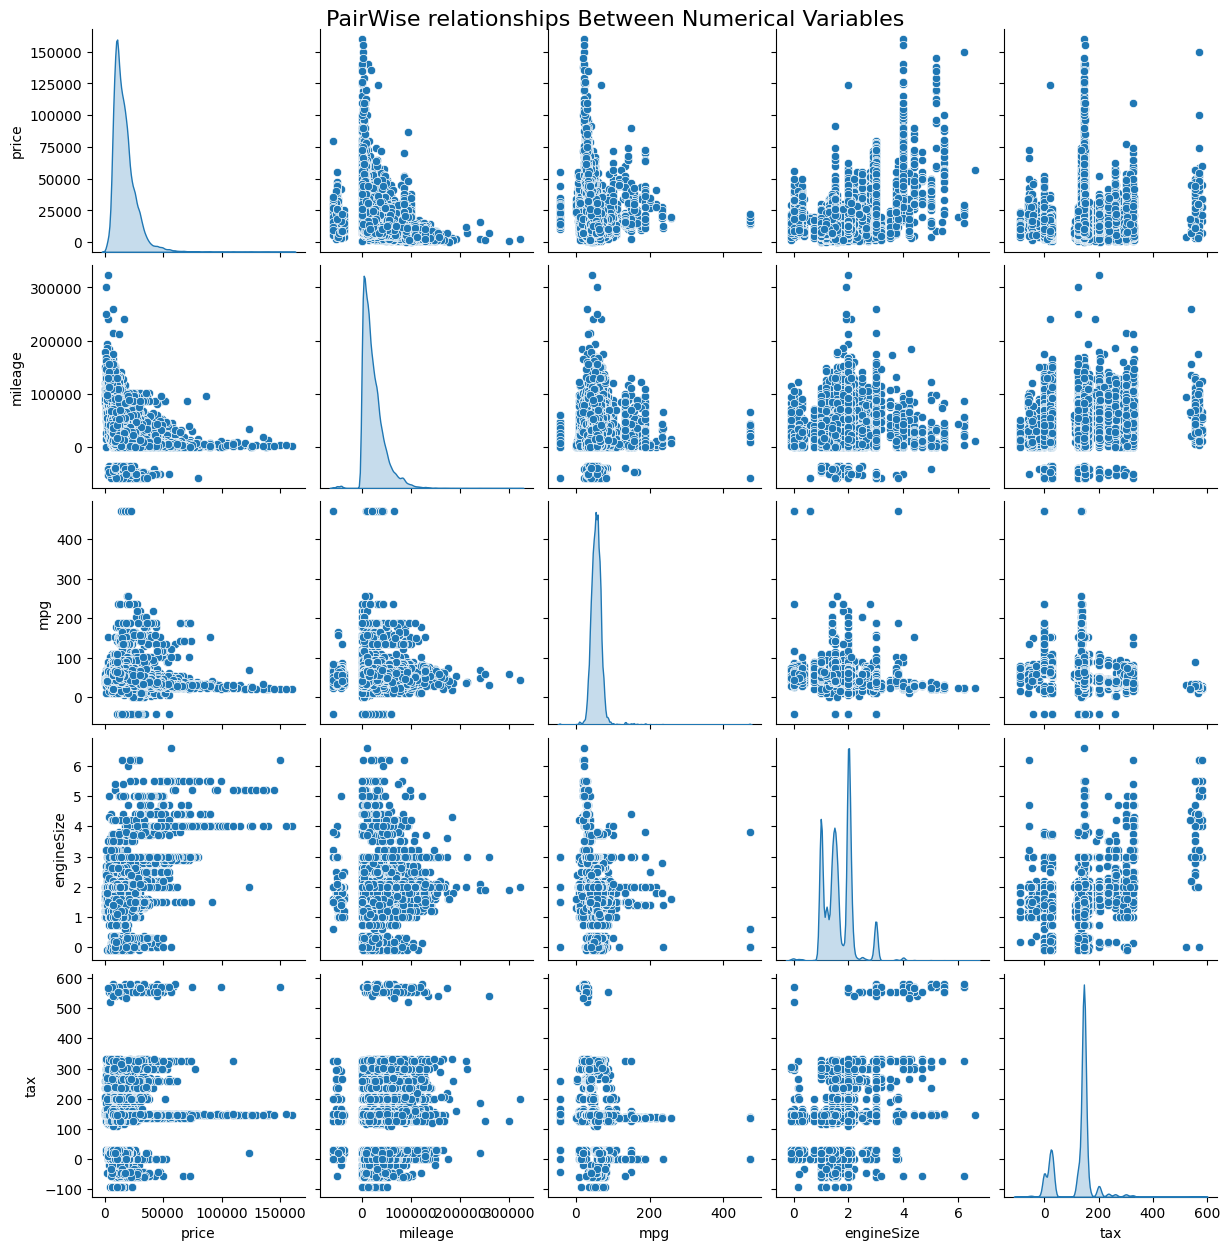

In [36]:
sns.pairplot(df_train[["price","mileage", "mpg", "engineSize", "tax"]], diag_kind="kde")
plt.suptitle("PairWise relationships Between Numerical Variables",
             y=1,
             fontsize=16)
plt.show()

Even in raw data, we can see **negative correlation** between `price` and `mileage`, and **positive correlation** between `price` and `engine size`. Noise and **missing values** reduce clarity, but initial **trends** are observable.

<h4 style="color: #00E676;">Multivariate Analysis - FuelType, Mileage, Price</h4> 

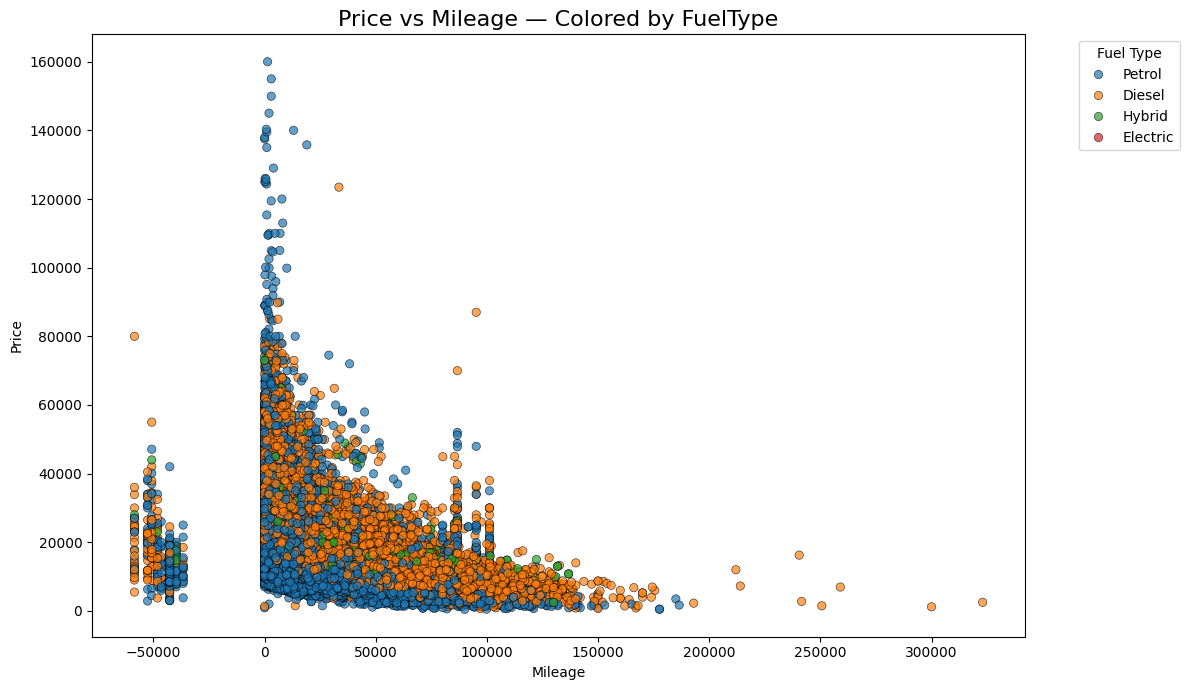

In [37]:
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="fuelType",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by FuelType", fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The analysis **confirms that depreciation** (the negative relationship between `Price` and `Mileage`) holds universally for the most common fuel types (Diesel and Petrol). However, `FuelType` acts as a shifting factor: Hybrid and (to a lesser extent) Electric cars are concentrated in the low `Mileage` and high Price area, indicating they are **newer** and **more expensive models** in the dataset. This pattern justifies the **importance** of including both `Mileage` (continuous) and `Fuel Type` (categorical) in the predictive model.

<h4 style="color: #00E676;">Multivariate Analysis - Brand, Mileage, Price</h4> 

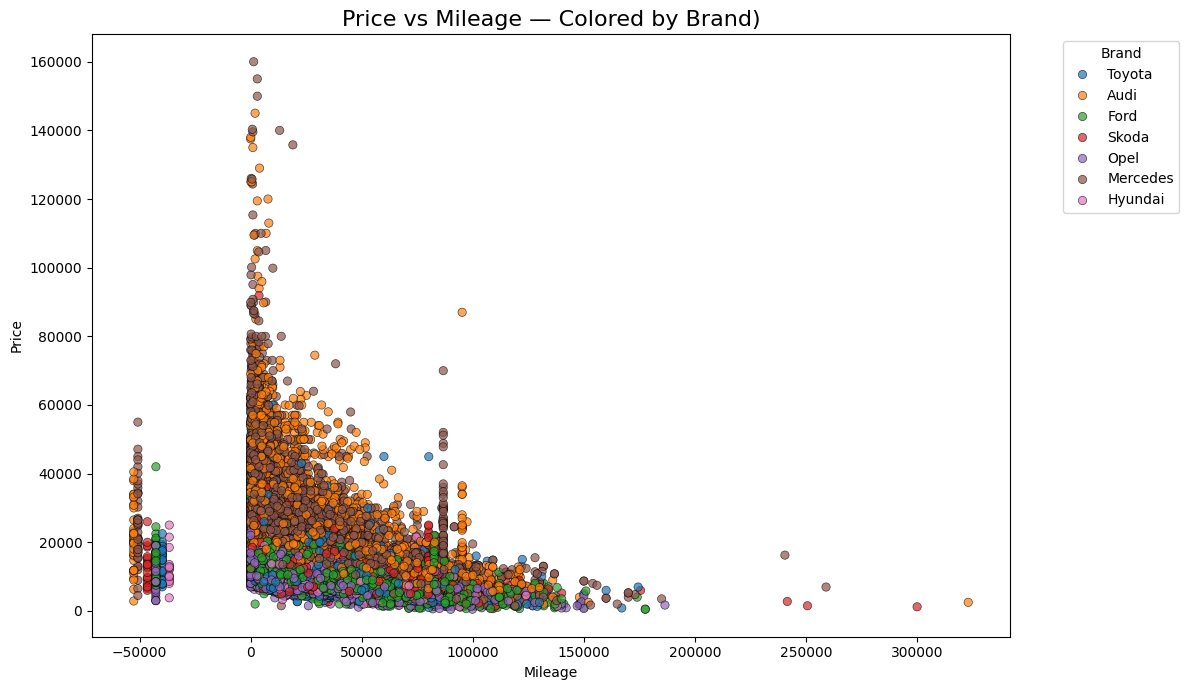

In [38]:
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="Brand",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by Brand)",
          fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The analysis reveals **significant segmentation** and **vertical stratification** by **brand**. While all `brands` adhere to the general principle of depreciation (`Price` decreases with `Mileage`), **premium brands** such as `Audi`, `BMW`, and `Mercedes` form **distinct**, **higher clusters**, showing consistently **higher prices** than mass-market brands like `Ford`, `Toyota`, and `Vw` at any given mileage point. This confirms that `Brand` is a **powerful categorical feature** whose market segment is **highly correlated** with the initial price and the retained value throughout the vehicle's lifespan, necessitating its inclusion via one-hot encoding in the model.

<h4 style="color: #00E676;">Multivariate Analysis - Price vs Year - Color=fuelType</h4> 

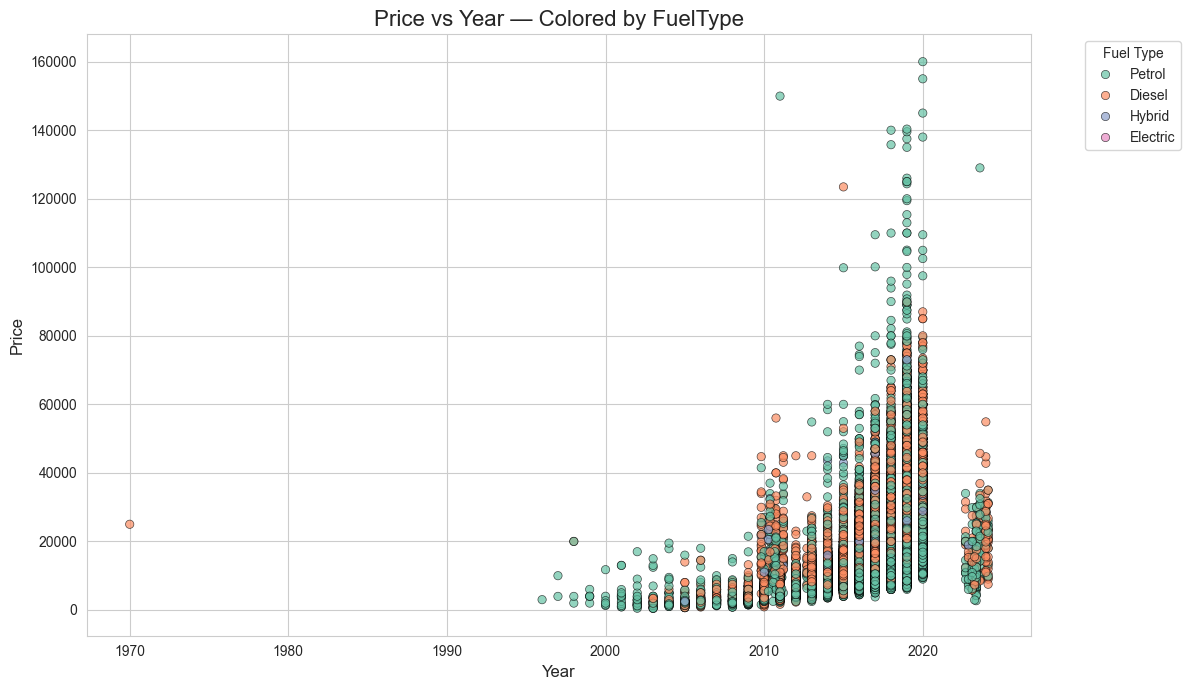

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",              
    y="price",                
    hue="fuelType",           
    palette="Set2",             
    alpha=0.7,                 
    edgecolor="k"            
)

# Titles and labels
plt.title("Price vs Year — Colored by FuelType",
          fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The analysis confirms the **strong positive relationship** between `Year` and `Price` (newer cars are more expensive) across all fuel types. `FuelType` causes a **horizontal** and **vertical segmentation**: `Petrol` and `Diesel` cars span the entire time range, representing the **full depreciation curve**. In contrast, `Hybrid` and `Electric` vehicles clustes heavily towards the most recent years (high Year values), commanding **higher baseline prices** than their conventional counterparts at the same age. This confirms that both the continuous variable `Year` and the categorical variable `FuelType` are **essential predictors** of the vehicle's value.

<h4 style="color: #00E676;">Multivariate Analysis - Price vs Year - Color= Brand</h4> 

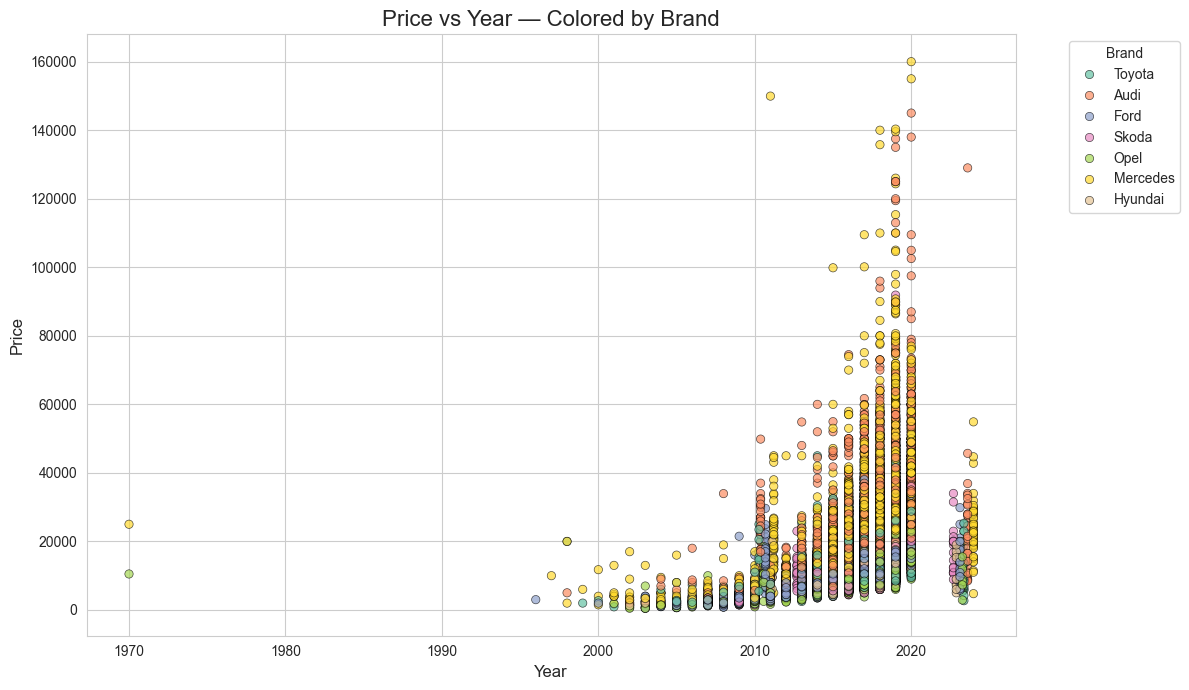

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",                
    y="price",                 
    hue="Brand",             
    palette="Set2",           
    alpha=0.7,                 
    edgecolor="k"               
)


plt.title("Price vs Year — Colored by Brand", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The analysis shows a clear **stratification** of **prices** by `brand`, confirming the **premium status** of certain manufacturers. All brands adhere to the fundamental rule that `Price` increases with `Year` (newer cars are more expensive). However, **Premium Brands** (`Audi`, `BMW`, `Mercedes`) form distinct, higher price clusters at any given year compared to **Mass-Market Brands** (`Ford`, `Toyota`, `VW`, `Opel`, `Hyundai`). This strong vertical separation confirms that `Brand` is a **critical predictor** of value, determining the `price` segment and baseline value of the vehicle regardless of its age. The **difference** in price retention and the ceiling price for the newer models are **visibly highest**for the premium group.

<h4 style="color: #00E676;">Pairplot to Brand</h4> 

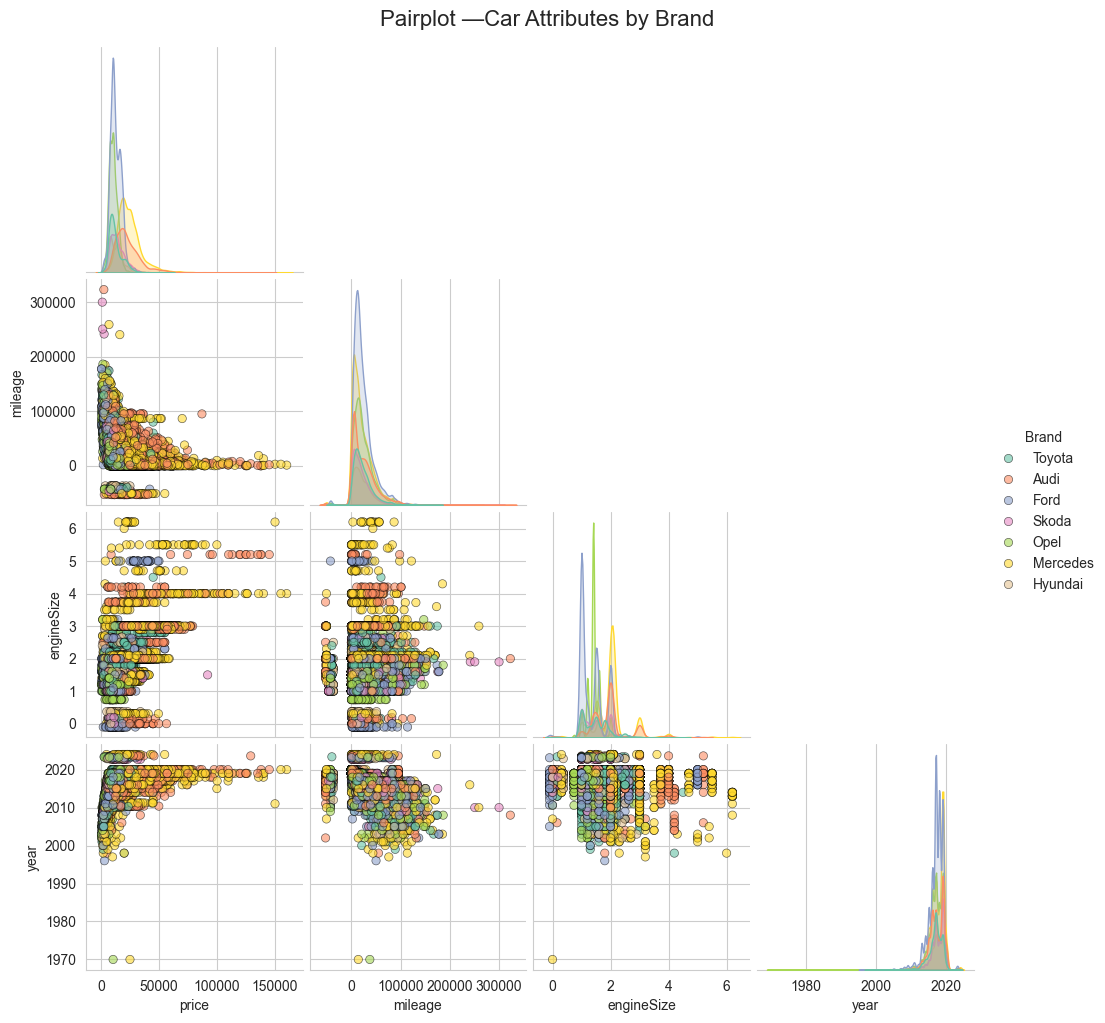

In [41]:
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="Brand",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)
plt.suptitle("Pairplot —Car Attributes by Brand",
             y=1.02,
             fontsize=16)
plt.show()

The pairplot **validates all previous multivariate** findings simultaneously. It confirms the **strong positive correlations** for Price vs. Year and `Price` vs. `Engine Size` and the **negative correlation** for `Price` vs. `Mileage`. Critically **Premium Brands** `Audi` `BMW` `Mercedes` consistently occupy the **highest** price and engine size clusters while Mass-Market Brands concentrate in the **lower ranges**. The plot confirms `Brand` is the **most significant categorical differentiator** dictating the expected distribution and maximum values for all other key numerical attributes.

<h4 style="color: #00E676;">Price distribution by Brand</h4> 

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_3828\381057388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


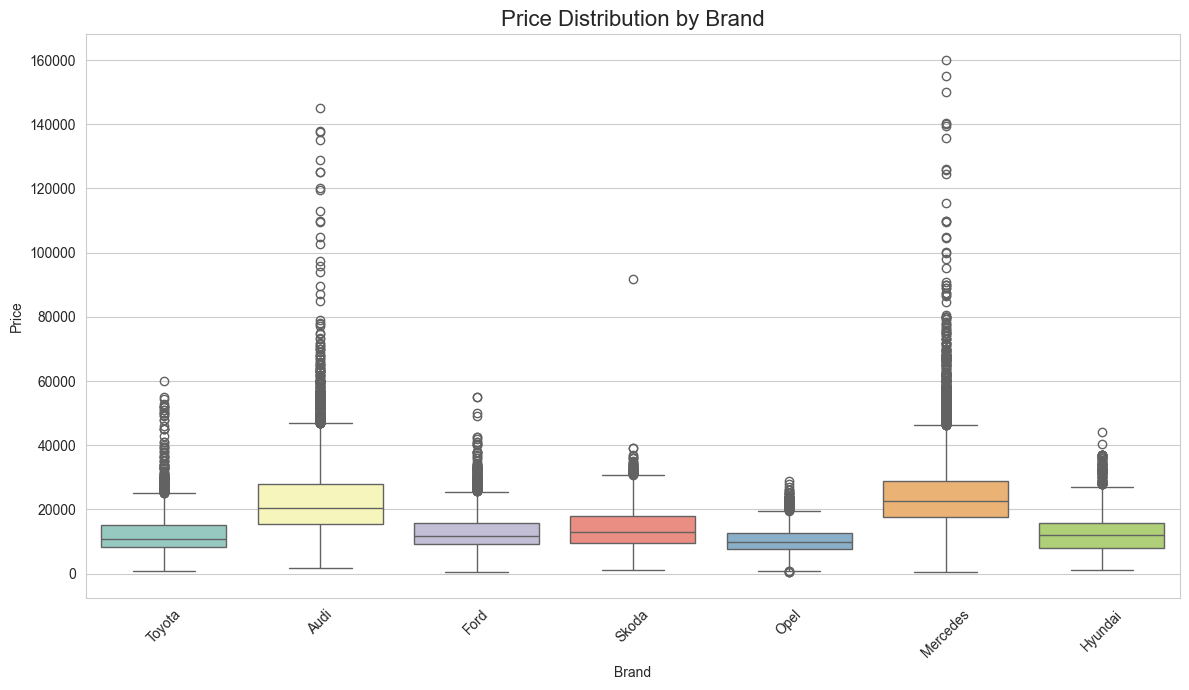

In [42]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.boxplot(
    data=df_filtered,
    x="Brand",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Brand", fontsize=16)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis shows **strong vertical stratification** of **median prices**: Premium Brands (`Mercedes`, `Audi`, `BMW`) exhibit the **highest median prices** and generally **have larger Interquartile Ranges** (IQR), indicating **higher price variability** and **value retention**. Mass-Market Brands (`Ford`, `VW`, `Toyota`, `Skoda`, `Opel`, `Hyundai`) form the **lower price** tier, with significantly **lower median prices** and generally smaller IQRs. All `brands` display a possible large number of **outliers** (individual points above the upper whisker), confirming the presence of **high-value**, **high-price vehicles** (e.g., performance or rare models) even within the standard brands. This strong **segmentation validates** the decision to use one-hot encoding on the `Brand` feature in the predictive model.

<h4 style="color: #00E676;">Price Distribution by Transmission</h4> 

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_3828\4222811036.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


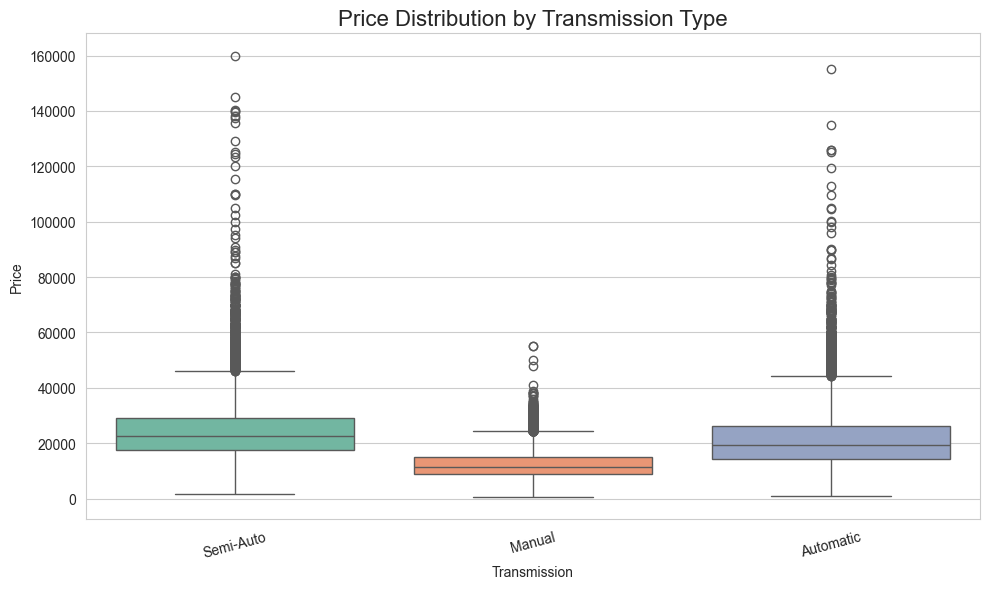

In [43]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.boxplot(
    data=df_filtered,
    x="transmission",
    y="price",
    palette="Set2"
)

plt.title("Price Distribution by Transmission Type", fontsize=16)
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The analysis confirms a **strong vertical stratification** in median prices: `Automatic` cars exhibit the **highest median price**, followed closely by `Semi-Auto`, while `Manual` cars have the **lowest median price**. Both automatic and `semi-automatic` `transmissions` display a greater `price` variability (larger interquartile range and longer whiskers), indicating they cover a **wider range** of **high-end** and **luxury vehicles** compared to `manual transmissions`. This segmentation is a **fundamental finding of the EDA**, underscoring why `transmission` type is a **critical categorical feature** for the predictive model.

<h4 style="color: #00E676;">Price Distribution by FuelType</h4> 

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_3828\4062865563.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


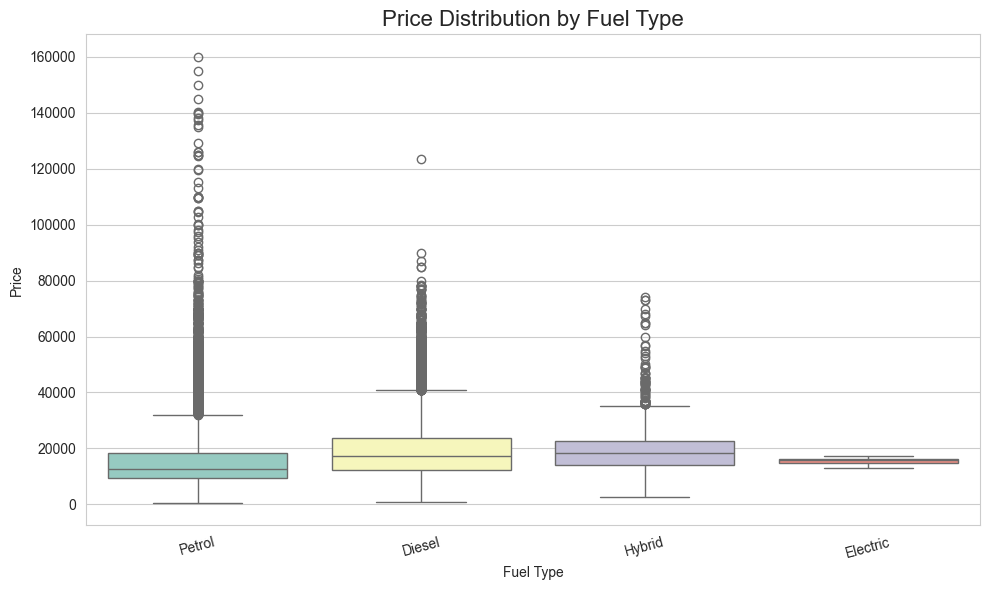

In [44]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_filtered,
    x="fuelType",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Fuel Type", fontsize=16)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The box plot of `Price` segmented by `Fuel Type` confirms **significant differences** in market value driven by **technology**. The analysis shows that `Hybrid` and `Electric` vehicles exhibit the **highest median prices** compared to the conventional `Diesel` and `Petrol` groups. `Diesel` cars occupy a mid-to-high price range, suggesting they retain **higher value** than petrol cars on average, which typically have the **lowest median price**. All segments display a similar spread of possible **outliers**, confirming the presence of high-value specialty vehicles across all `fuel types`. This segmentation validates `Fuel Type` as a critical categorical feature for predicting vehicle price.

<h4 style="color: #00E676;">Key Car Attributes by Transmission</h4> 

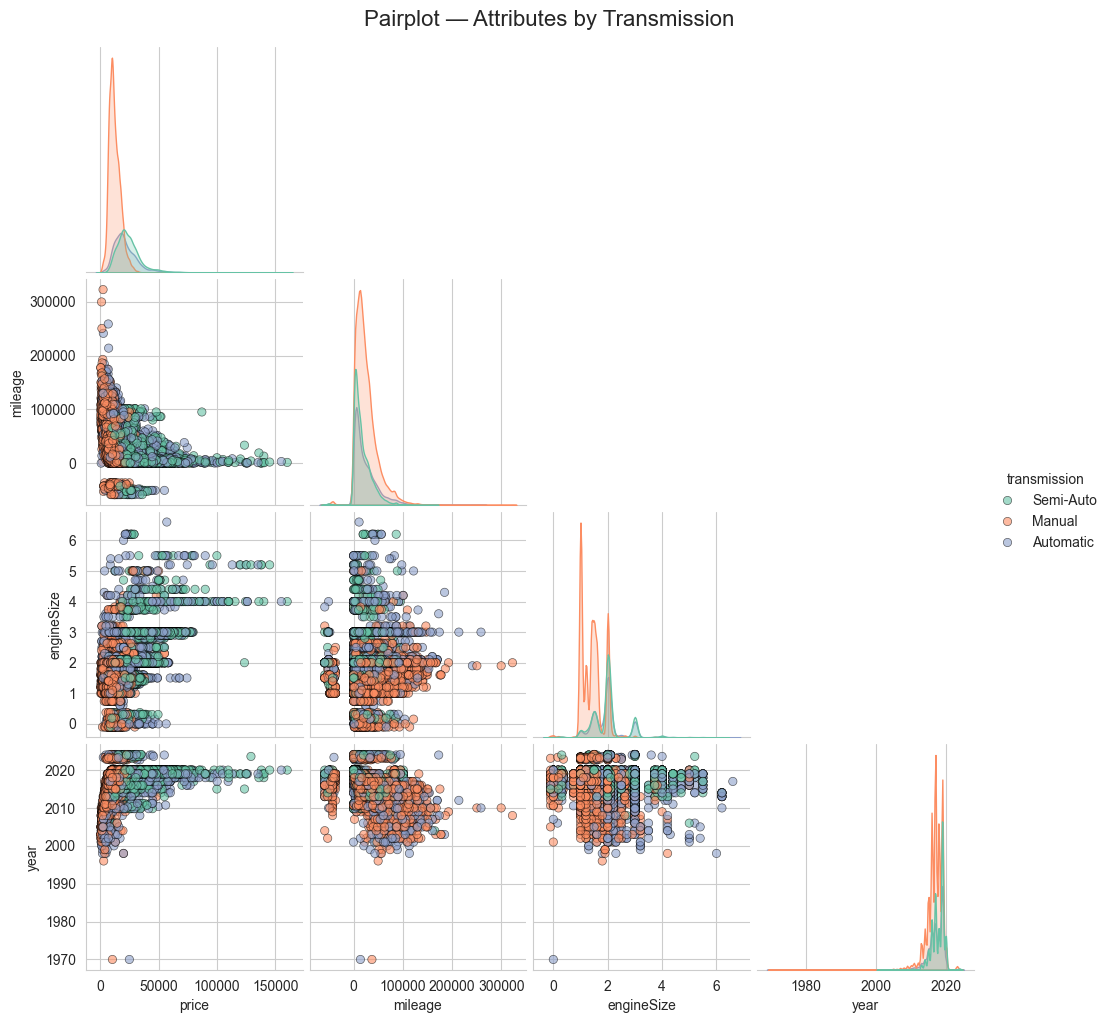

In [45]:
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="transmission",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Transmission", y=1.02, fontsize=16)
plt.show()

The pairplot provides comprehensive confirmation that `Transmission` is a **major segmenting factor** in the used car market, influencing the **distribution and relationships** of all other key attributes. `Automatic` and `Semi-Auto` vehicles consistently form higher value clusters across the plots: they dominate the highest price ranges (`Price` vs. `Year/EngineSize`) and are strongly associated with larger `Engine Sizes` (`EngineSize` vs. `Mileage/Price`). In contrast, **Manual** vehicles typically occupy the **lower to mid-range values** in `Price` and `Engine Size`, while their mileage is spread more widely across all years. This **stratification** confirms that the **complexity** and market preference for **automatic transmissions** set a fundamentally higher baseline value and are linked to more expensive, powerful vehicles.

<h4 style="color: #00E676;">Key Car Attributes by Fuel Type</h4> 

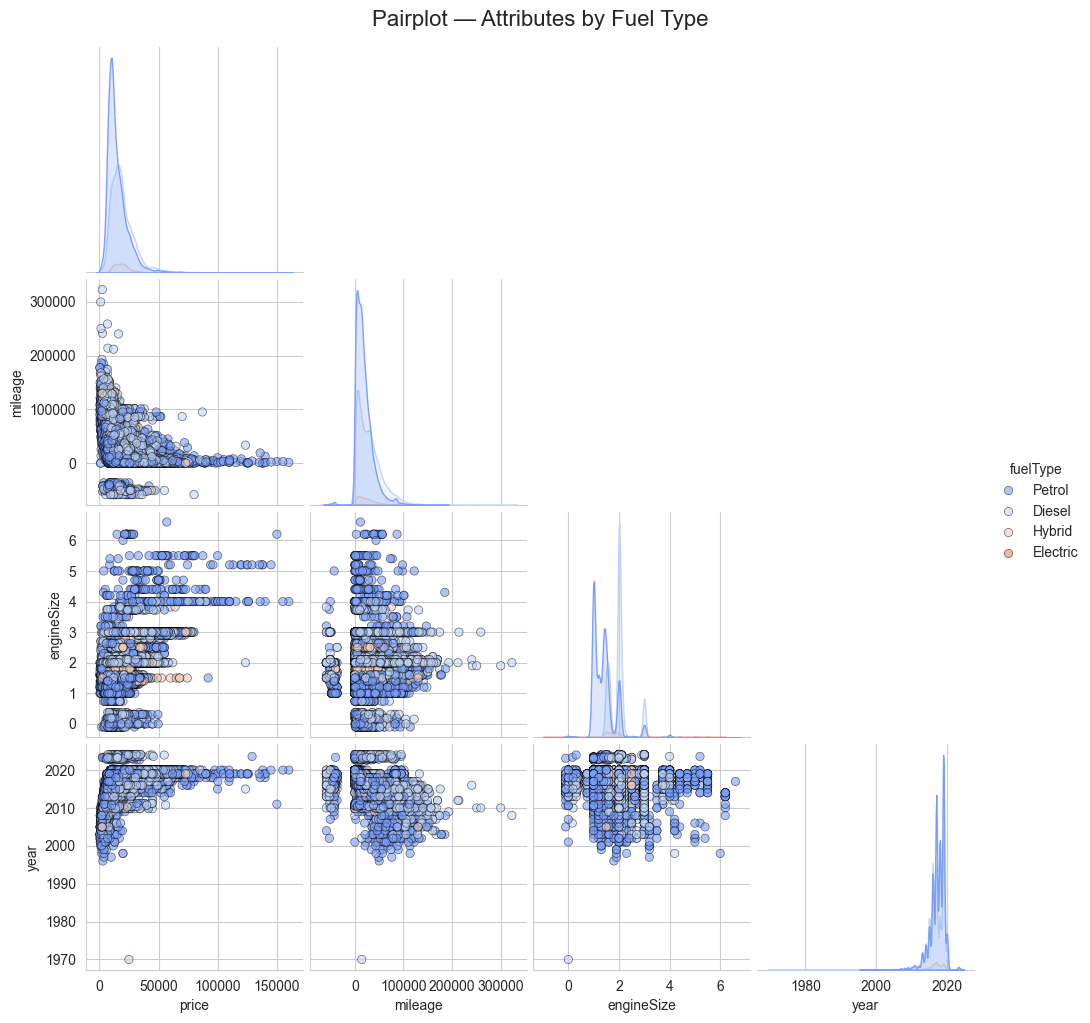

In [46]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="fuelType",
    palette="coolwarm",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Fuel Type", y=1.02, fontsize=16)
plt.show()

The pairplot provides a comprehensive view of how` Fuel Type` **segments** the vehicle market based on **value**, **age**, and **engine characteristics**. `Hybrid` and `Electric` vehicles consistently form distinct clusters at the **highest prices** (`Price` vs. `Year/Mileage`) and are heavily concentrated in the newest years (high Year values). Critically, they also cluster around the **smallest engine sizes** (`Engine Size` plots). `Petrol` and `Diesel` vehicles, representing the **conventional market**, span the entire range of values and are associated with a broader spectrum of `engine sizes` and `prices`. This segmentation **confirms** that `Fuel Type` is a **primary categorical differentiator**, separating the established depreciation curve of conventional cars from the **high-value**, **low-mileage** profile of newer, alternative-fuel technologies.

<h4 style="color: #00E676;">Correlation Matrix before cleaning the data</h4> 

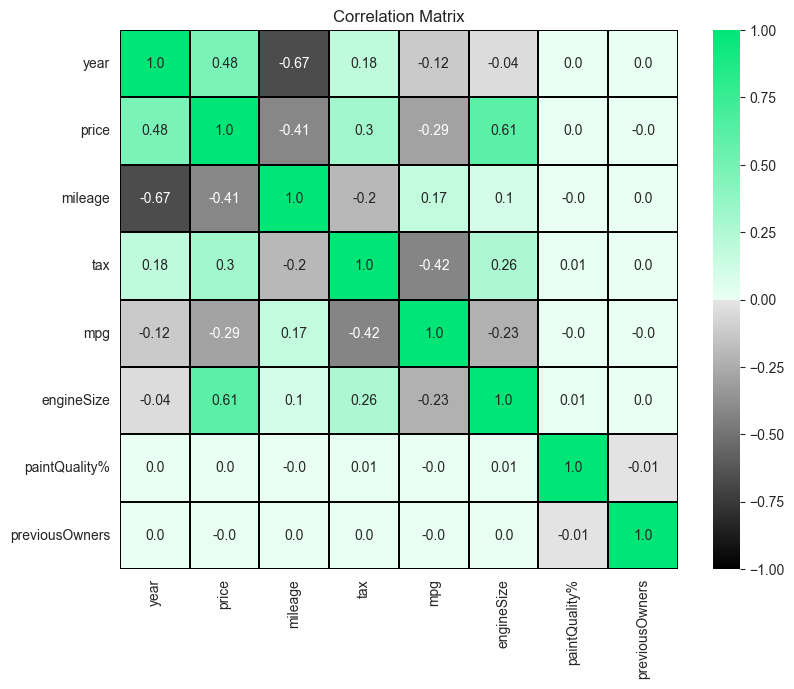

In [47]:
num = df_train.select_dtypes(include="number").drop(columns=["carID", "hasDamage"], errors="ignore")
corr = num.corr(numeric_only=True).round(2)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

The matrix immediately confirms the **strongest linear relationships** with the **target variable**, `price`. `engineSize` exhibits the **strongest positive correlation** ($\approx$ 0.61). `Year` follows closely with a **strong** ($\approx$ 0.48), indicating that newer cars are **significantly more expensive**. The only notable **negative relationship** is with `mileage` ($\approx$ -0.41), confirming that higher mileage leads to a **lower price** (depreciation). **High** inter-feature **correlations**, such as between `engineSize` and `tax` ($\approx$ 0.26), also highlight potential **multicollinearity issues** that might require attention during model selection (e.g., using regularization techniques). Overall, the **heatmap validates** `Year` and `engineSize` as the **most influential numerical predictors** of price.

<h1 style="color: #00E676;">2. Data Preprocessing</h1>

In [54]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [55]:
df_train.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.00,74482.00,75973.00,74510.00,68069.00,68047.00,74457.00,74449.00,74423.00,74425.0
mean,37986.00,2017.10,16881.89,23004.18,120.33,55.15,1.66,64.59,1.99,0.0
std,21931.66,2.21,9736.93,22129.79,65.52,16.50,0.57,21.02,1.47,0.0
min,0.00,1970.00,450.00,-58540.57,-91.12,-43.42,-0.10,1.64,-2.35,0.0
25%,18993.00,2016.00,10200.00,7423.25,125.00,46.30,1.20,47.00,1.00,0.0
50%,37986.00,2017.00,14699.00,17300.00,145.00,54.30,1.60,65.00,2.00,0.0
75%,56979.00,2019.00,20950.00,32427.50,145.00,62.80,2.00,82.00,3.00,0.0
max,75972.00,2024.12,159999.00,323000.00,580.00,470.80,6.60,125.59,6.26,0.0


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [57]:
df_train_new = df_train.copy()
df_test_new  = df_test.copy()


<h4 style="color: #00E676;">Remove column "HasDamage"</h4> 

In [58]:
def initial_cleaning(df):
    if "hasDamage" in df.columns:
        df = df.drop(columns=["hasDamage", "paintQuality%"])
    
    return df

In [59]:
df_train_new = initial_cleaning(df_train_new)
df_test_new = initial_cleaning(df_test_new)
df_train_new.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,4.000000
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,1.000000
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,4.000000
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,-2.340306
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,3.000000


**Dropping** the `HasDamage` column, since all known values are `0` and the variable has **no relevance** for the model.

<h2 style="color: #00E676;">2.1. Digitalization Problems Solve</h2>

<h3 style="color: #00E676;">2.1.1. Brand </h3>

**Correction** of the **brand names** in the `Brand` column, with only the `N/A` **values remaining**.

In [60]:
def dig_solve_brand(df):
    brand_clean = df["Brand"].astype(str).str.strip().str.lower()

    # 2 — Dicionário de correções
    corrections = {
        "ercece": "mercedes", "mercede": "mercedes", "ercedes": "mercedes", "ercede": "mercedes",
        "for": "ford", "ord": "ford", "or": "ford",
        "bmw": "bmw", "mw": "bmw", "bm": "bmw", "m": "bmw",
        "ope": "opel", "pel": "opel", "pe": "opel",
        "vw": "vw", "w": "vw", "v": "vw",
        "aud": "audi", "udi": "audi", "ud": "audi",
        "oyota": "toyota", "toyot": "toyota", "oyot": "toyota",
        "koda": "skoda", "skod": "skoda", "kod": "skoda",
        "hyunda": "hyundai", "yundai": "hyundai", "yunda": "hyundai",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": np.nan
    }

    # 3 — Aplicar correções
    brand_clean = brand_clean.replace(corrections)

    # 4 — Converter para Title Case (BMW → Bmw → preferes?)
    df["Brand_clean"] = brand_clean.str.title()

    return df

In [61]:
df_train_new = dig_solve_brand(df_train_new)
df_test_new = dig_solve_brand(df_test_new)
df_train_new["Brand_clean"].value_counts(dropna=False)


Brand_clean
Ford        16063
Mercedes    11674
Vw          10385
Opel         9352
Bmw          7392
Audi         7325
Toyota       4622
Skoda        4303
Hyundai      3336
NaN          1521
Name: count, dtype: int64

<h3 style="color: #00E676;">2.1.2. Fuel Type </h3>

**Correct** the **names** of the **different fuel types** in the `Fueltype` column, leaving only the `N/A` **values remaining**.

In [62]:
def dig_solve_type(df):
    fuel = df["fuelType"].astype(str).str.strip().str.lower()

    # Correções
    corrections = {
        "petro": "petrol", "etrol": "petrol", "etro": "petrol",
        "iesel": "diesel", "diese": "diesel", "iese": "diesel",
        "hybri": "hybrid", "ybrid": "hybrid", "ybri": "hybrid",
        "othe": "other", "ther": "other",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": np.nan
    }

    # Corrigir
    fuel = fuel.replace(corrections)

    df["fuelType_clean"] = fuel

    return df

In [63]:
df_train_new = dig_solve_type(df_train_new)
df_test_new = dig_solve_type(df_test_new)
df_train_new["fuelType_clean"].value_counts(dropna=False)


fuelType_clean
petrol      41181
diesel      30885
hybrid       2225
NaN          1511
other         167
electric        4
Name: count, dtype: int64

<h3 style="color: #00E676;">2.1.3. Transmission </h3>


**Correct** the **names** of the **different transmission types** in the `transmission` column, leaving only the `N/A` **values remaining**

In [64]:
def dig_solve_transmission(df):
    tr = df["transmission"].astype(str).str.strip().str.lower()

    corrections = {
        "anual": "manual", "manua": "manual", "anua": "manual",
        "semi-aut": "semi-auto", "emi-auto": "semi-auto", "emi-aut": "semi-auto",
        "automati": "automatic", "utomatic": "automatic", "utomati": "automatic",
        "unknow": "unknown", "nknown": "unknown", "nknow": "unknown",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": "unknown"
    }

    # aplicar correções
    tr = tr.replace(corrections)

    # nova coluna
    df["transmission_clean"] = tr

    return df

In [65]:
df_train_new = dig_solve_transmission(df_train_new)
df_test_new = dig_solve_transmission(df_test_new)
df_test_new["transmission_clean"].value_counts(dropna=False)


transmission_clean
manual       17889
semi-auto     7267
automatic     6440
NaN            623
unknown        345
other            3
Name: count, dtype: int64

In [66]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 15)
(32567, 14)


<h3 style="color: #00E676;">2.1.4. Model - Correction model names with RapidFuzz </h3>

A normalization function `(_norm)` was developed to **standardize strings** before correction, converting them to **lowercase**, **special characters**, and **extra spaces** to ensure **consistent comparisons**.

Then, the `find_best_in_catalog` function was created to check whether a **value exists** in the **canonical catalog** and, if not, apply approximate **matching** (fuzzy matching) using the `RapidFuzz` library. The algorithms `token_set_ratio` and `token_sort_ratio` were used, returning the most **similar value**, its similarity score, and the method applied. Two `thresholds` (threshold_high and threshold_low) were also defined to **control** the **confidence level** of accepted matches.

Based on this function, a **canonical catalog** of models was built for **each brand**, considering only models with a frequency above a brand-specific limit defined in `threshold_dict`. For each brand, the function was applied within its ***respective catalog**, and valid matches (`token_set` or `token_sort`) were stored in a **mapping** dictionary (`model_cleaning_dict`).

Finally, the `model_clean_fuzzy` column was created to apply the **automatic corrections** stored in the **dictionary**, **keeping** the **original value** when **no match** was found. This process ensured the standardization of model names within each brand,** reducing spelling errors** and **inconsistencies**.

In [67]:
def _norm(s):
    if s is None or (isinstance(s, float) and pd.isna(s)):
        return ""
    s = str(s).casefold().strip()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"[/_.\-]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s


def find_best_in_catalog(word, catalog_list, threshold_high=92, threshold_low=85):
    if word is None or (isinstance(word, float) and pd.isna(word)):
        return (word, 0.0, "null")
    if not catalog_list:
        return (word, 0.0, "no_catalog")

    word_norm = _norm(word)

    # canonical representation of the catalog
    norm_map = {_norm(c): c for c in catalog_list}

    # Already exists in the catalog?
    if word_norm in norm_map:
        return (word, 100.0, "exact_in_catalog")

    # fuzzy matching
    best, score, _ = process.extractOne(word_norm, catalog_list, scorer=fuzz.token_set_ratio)
    method = "token_set"

    best2, score2, _ = process.extractOne(word_norm, catalog_list, scorer=fuzz.token_sort_ratio)
    if score2 > score:
        best, score, method = best2, score2, "token_sort"

    if score >= threshold_high:
        return (best, float(score), method)
    elif score >= threshold_low:
        return (best, float(score), method)
    else:
        return (best, float(score), "review")


def build_model_catalog(df_train, threshold_dict):
    catalog_dict = {}

    for brand in df_train["Brand_clean"].dropna().unique():
        df_brand = df_train[df_train["Brand_clean"] == brand].copy()

        freq = (
            df_brand
            .dropna(subset=["model"])
            .groupby("model")
            .size()
            .reset_index(name="count")
            .sort_values(by="count", ascending=False)
        )

        threshold = threshold_dict.get(brand, 0)

        most_freq_models = list(freq[freq["count"] >= threshold]["model"])
        catalog_dict[brand] = most_freq_models

    return catalog_dict


def build_model_cleaning_dict(df_train, catalog_dict, threshold_dict):
    cleaning_dict = {}

    for brand in df_train["Brand_clean"].dropna().unique():
        df_brand = df_train[df_train["Brand_clean"] == brand].copy()

        catalog_list = catalog_dict.get(brand, [])

        for model in df_brand["model"].dropna().unique():
            match, score, status = find_best_in_catalog(
                model,
                catalog_list,
                threshold_high=92,
                threshold_low=85
            )

            if status in ("token_set", "token_sort", "exact_in_catalog"):
                cleaning_dict[f"{brand}-{model}"] = match

    return cleaning_dict


def apply_model_cleaning(df, cleaning_dict):
    df["model_clean_fuzzy"] = (
        (df["Brand_clean"] + "-" + df["model"])
        .map(cleaning_dict)
        .fillna(df["model"])
    )
    df["model_clean_fuzzy"] = (
        df["model_clean_fuzzy"]
        .astype(str)
        .str.strip()
        .str.casefold()
    )    
    return df

In [68]:
threshold_dict = {
    "ford": 139,
    "vw": 40,
    "opel": 66,
    "mercedes": 128,
    "bmw": 66,
    "audi": 219,
    "toyota": 34,
    "skoda": 86,
    "hyundai": 70,
}

In [69]:
catalog_dict = build_model_catalog(df_train_new, threshold_dict)
model_cleaning_dict = build_model_cleaning_dict(df_train_new, catalog_dict, threshold_dict)
df_train_new = apply_model_cleaning(df_train_new, model_cleaning_dict)
df_test_new = apply_model_cleaning(df_test_new, model_cleaning_dict)


In [70]:
df_train_new["model_clean_fuzzy"].apply(type).value_counts()

model_clean_fuzzy
<class 'str'>    75973
Name: count, dtype: int64

In [71]:
print(df_train_new.columns)
print(df_test_new.columns)

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_clean',
       'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy'],
      dtype='object')
Index(['carID', 'Brand', 'model', 'year', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_clean',
       'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy'],
      dtype='object')


In [72]:
df_train_new.drop(columns=["Brand", "model", "fuelType", "transmission"], inplace=True)
df_test_new.drop(columns=["Brand", "model", "fuelType", "transmission"], inplace=True)

In [73]:
print(df_train_new.columns)
print(df_test_new.columns)

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')
Index(['carID', 'year', 'mileage', 'tax', 'mpg', 'engineSize',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')


In [74]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 12)
(32567, 11)


“A normalização dos nomes dos modelos foi realizada utilizando métodos determinísticos e fuzzy matching baseado exclusivamente no conjunto de treino, sem utilizar qualquer informação do target. O catálogo de modelos corrigidos foi então aplicado ao conjunto de teste. Como esta transformação depende apenas das categorias presentes e não de qualquer métrica estatística, não introduz data leakage e pode ser executada antes da Cross-Validation.”

<h2 style="color: #00E676;">2.2. Solve inconsistencies</h2>

<h3 style="color: #00E676;">2.2.1. Convert to N/A - Mileage</h3> 

In [75]:
def convert_to_na(df):
    # mileage: converter para numérico + tratar negativos
    df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
    df["mileage"] = df["mileage"].where(df["mileage"] >= 0, other=np.nan
    )
    

    return df

In [76]:
df_train_new = convert_to_na(df_train_new)
df_test_new = convert_to_na(df_test_new)


In [77]:
print((df_train_new["mileage"] < 0).sum(), (df_test_new["mileage"] < 0).sum())

0 0


In [78]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 12)
(32567, 11)


<h3 style="color: #00E676;">2.2.2. Solve Mpg</h> 

In [79]:
def fix_mpg(df_to_fix, reference_df):

    # mpg do dataset a corrigir
    mpg_fix = pd.to_numeric(df_to_fix["mpg"], errors="coerce")
    model_fix = df_to_fix["model_clean_fuzzy"].astype(str).str.strip().str.casefold()

    # mpg do dataset de referência (train)
    mpg_ref = pd.to_numeric(reference_df["mpg"], errors="coerce")
    model_ref = reference_df["model_clean_fuzzy"].astype(str).str.strip().str.casefold()

    # mediana por modelo (apenas valores válidos da referência)
    med_por_modelo = mpg_ref[mpg_ref >= 0].groupby(model_ref[mpg_ref >= 0]).median()

    # negativos no dataset a corrigir
    negative = mpg_fix < 0

    # aplicar correção
    df_to_fix.loc[negative, "mpg"] = model_fix.map(med_por_modelo)

    return df_to_fix


In [80]:
df_train_new = fix_mpg(df_train_new, df_train_new)
df_test_new = fix_mpg(df_test_new, df_train_new)

In [81]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 12)
(32567, 11)


<h3 style="color: #00E676;">2.2.3. Convert to positive values - Tax and PreviousOwners</h3> 

In [82]:
def fix_tax_previous_owners(df):
    # Converter tax negativo em positivo
    df["tax"] = df["tax"].mask(df["tax"] < 0, -df["tax"])
    
    # Converter previousOwners negativo em positivo
    df["previousOwners"] = df["previousOwners"].mask(df["previousOwners"] < 0, -df["previousOwners"])
    
    # Arredondar previousOwners para inteiro
    df["previousOwners"] = df["previousOwners"].round()
    
    return df

In [83]:
df_train_new = fix_tax_previous_owners(df_train_new)
df_test_new = fix_tax_previous_owners(df_test_new)

In [84]:
print((df_train_new["tax"] < 0).sum(), (df_train_new["previousOwners"] < 0).sum())

0 0


<h3 style="color: #00E676;">2.2.4. Fix invalid engineSize values</h3> 

<h4 style="color: #00E676;"> Solve negative values </h4> 

In [85]:
def fix_engineSize_Ford(df, reference_df):
    df = df.copy()
    reference_df = reference_df.copy()
    eng = pd.to_numeric(df["engineSize"], errors="coerce")
    brand = df["Brand_clean"].astype(str).str.casefold()
    model = df["model_clean_fuzzy"].astype(str).str.casefold()

    # apenas Ford tem engineSize negativo
    ford_mask = brand == "ford"
    negative_eng = eng < 0

    # dados do train
    ref_eng = pd.to_numeric(reference_df["engineSize"], errors="coerce")
    ref_brand = reference_df["Brand_clean"].astype(str).str.casefold()
    ref_model = reference_df["model_clean_fuzzy"].astype(str).str.casefold()

    # modelos válidos da Ford no train
    valid = (ref_brand == "ford") & (ref_eng >= 0)

    # mediana por modelo Ford
    med_por_modelo = ref_eng[valid].groupby(ref_model[valid]).median()

    # corrigir engineSize negativo em Ford
    df.loc[ford_mask & negative_eng, "engineSize"] = model.map(med_por_modelo)

    return df

In [86]:
df_train_new.loc[df_train_new["engineSize"] < 0, "model_clean_fuzzy"].unique()


array(['kuga', 'focus', 'fiesta', 's-max', 'mondeo', 'focu', 'c-max',
       'ka+', 'b-max', 'nan', 'ecosport', 'galaxy', 'ka'], dtype=object)

In [87]:
df_train_new = fix_engineSize_Ford(df_train_new, df_train_new)
df_test_new = fix_engineSize_Ford(df_test_new, df_train_new)

<h4 style="color: #00E676;"> Solve engsize type of fuel </h4> 

In [88]:
print("Train  | engineSize = 0 & petrol:",
      ((df_train_new["engineSize"] == 0) & (df_train_new["fuelType_clean"] == "petrol")).sum())
print("Test   | engineSize = 0 & petrol:",
      ((df_test_new["engineSize"] == 0) & (df_test_new["fuelType_clean"] == "petrol")).sum())

print("Train  | engineSize = 0 & diesel:",
      ((df_train_new["engineSize"] == 0) & (df_train_new["fuelType_clean"] == "diesel")).sum())
print("Test   | engineSize = 0 & diesel:",
      ((df_test_new["engineSize"] == 0) & (df_test_new["fuelType_clean"] == "diesel")).sum())

Train  | engineSize = 0 & petrol: 106
Test   | engineSize = 0 & petrol: 58
Train  | engineSize = 0 & diesel: 48
Test   | engineSize = 0 & diesel: 21


In [89]:
def fix_engineSize(df):
    df = df.copy()
    df["engineSize"] = pd.to_numeric(df["engineSize"], errors="coerce")
    mask = (df["engineSize"] == 0) & (df["fuelType_clean"].isin(["petrol", "diesel"]))    
    df.loc[mask, "engineSize"] = np.nan
    return df

In [90]:
df_train_new = fix_engineSize(df_train_new)
df_test_new  = fix_engineSize(df_test_new)

In [91]:
print("Train  | engineSize = 0 & petrol:",
      ((df_train_new["engineSize"] == 0) & (df_train_new["fuelType_clean"] == "petrol")).sum())
print("Test   | engineSize = 0 & petrol:",
      ((df_test_new["engineSize"] == 0) & (df_test_new["fuelType_clean"] == "petrol")).sum())

print("Train  | engineSize = 0 & diesel:",
      ((df_train_new["engineSize"] == 0) & (df_train_new["fuelType_clean"] == "diesel")).sum())
print("Test   | engineSize = 0 & diesel:",
      ((df_test_new["engineSize"] == 0) & (df_test_new["fuelType_clean"] == "diesel")).sum())

Train  | engineSize = 0 & petrol: 0
Test   | engineSize = 0 & petrol: 0
Train  | engineSize = 0 & diesel: 0
Test   | engineSize = 0 & diesel: 0


Impossivel carros a petrol ou disel terem engsize negativos ou a 0

<h3 style="color: #00E676;">2.2.5. Solve year above 2020 </h3> 

In [92]:
def mark_invalid_year(df, year_max=2020):
    y = pd.to_numeric(df["year"], errors="coerce")
    df["year"] = y.where((y <= year_max), other=np.nan)
    return df

In [93]:
df_train_new = mark_invalid_year(df_train_new)
df_test_new  = mark_invalid_year(df_test_new)

In [94]:
print("Treino > 2020:", (df_train_new["year"] > 2020).sum())
print("Teste > 2020:",  (df_test_new["year"] > 2020).sum())

print("Treino NaN year:", df_train_new["year"].isna().sum())
print("Teste NaN year:", df_test_new["year"].isna().sum())

Treino > 2020: 0
Teste > 2020: 0
Treino NaN year: 1849
Teste NaN year: 833


<h4 style="color: #00E676;">2.2.6. Round Cols</h4> 

In [95]:
def round_columns(df):
    cols = ["mpg", "previousOwners", "mileage"]
    df[cols] = df[cols].round(2)
    return df

In [96]:
df_train_new = round_columns(df_train_new)
df_test_new  = round_columns(df_test_new)
df_train_new.head()

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
0,69512,2016.0,22290,28421.0,NaN,11.42,2.0,4.0,Vw,petrol,semi-auto,golf
1,53000,2019.0,13790,4589.0,145.0,47.90,1.5,1.0,Toyota,petrol,manual,yaris
2,6366,2019.0,24990,3624.0,145.0,40.90,1.5,4.0,Audi,petrol,semi-auto,q2
3,29021,2018.0,12500,9102.0,145.0,65.70,1.0,2.0,Ford,petrol,manual,fiesta
4,10062,2019.0,22995,1000.0,145.0,42.80,1.5,3.0,Bmw,petrol,manual,2 series


The **.round(2) function** is applied to the `mpg`, `previousOwners`, and `mileage` columns to **round** their values to **two decimal** places, standardizing the **numerical** precision.

<h2 style="color: #00E676;">2.3. Missing Values</h2>

In [97]:
print(df_train_new.isnull().sum())
print("--------------------------")
print(df_test_new.isnull().sum())

carID                    0
year                  1849
price                    0
mileage               1832
tax                   7904
mpg                   7926
engineSize            1670
previousOwners        1550
Brand_clean           1521
fuelType_clean        1511
transmission_clean    1522
model_clean_fuzzy        0
dtype: int64
--------------------------
carID                    0
year                   833
mileage                859
tax                   3308
mpg                   3288
engineSize             707
previousOwners         597
Brand_clean            649
fuelType_clean         656
transmission_clean     623
model_clean_fuzzy        0
dtype: int64


<h3 style="color: #00E676;"> Year </h3>

In [98]:
def fit_year_imputer(df_train):
    df = df_train.copy()

    # mediana do ano por modelo
    year_model = df.groupby("model_clean_fuzzy")["year"].median()

    # mediana do ano por marca
    year_brand = df.groupby("Brand_clean")["year"].median()

    # mediana global
    year_global = df["year"].median()

    return {
        "year_model": year_model,
        "year_brand": year_brand,
        "year_global": year_global,
    }


In [99]:
def transform_year(df, stats_year):
    df = df.copy()

    missing = df["year"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) por modelo
        est = pd.Series(
            stats_year["year_model"].reindex(df.loc[missing, "model_clean_fuzzy"]).values,
            index=idx
        )

        # 2) fallback: por marca
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_year["year_brand"].reindex(df.loc[missing, "Brand_clean"][missing2]).values,
                index=est.index[missing2]
            )

        # 3) fallback final: global
        est = est.fillna(stats_year["year_global"])

        df.loc[missing, "year"] = est.round().astype("Int64")

    return df


<h3 style="color: #00E676;"> Mileage </h3>

In [100]:
def fit_mileage_imputer(df_train, ref_year=2020):
    df = df_train.copy()

    age_car = (ref_year - df["year"]).clip(lower=0)
    valid_car = df["mileage"].notna() & df["year"].notna() & (age_car > 0)

    rate_per_year = df.loc[valid_car, "mileage"] / age_car.loc[valid_car]

    rate_model  = rate_per_year.groupby(df.loc[valid_car, "model_clean_fuzzy"]).mean()
    rate_brand  = rate_per_year.groupby(df.loc[valid_car, "Brand_clean"]).mean()
    rate_global = rate_per_year.median()

    mask_2020 = (df["year"] == 2020) & df["mileage"].notna()
    r_2020 = df.loc[mask_2020, "mileage"].median()

    return {
        "ref_year": ref_year,
        "rate_model": rate_model,
        "rate_brand": rate_brand,
        "rate_global": rate_global,
        "mileage_2020_median": r_2020,
    }

def transform_mileage(df, stats):
    df = df.copy()

    ref_year = stats["ref_year"]
    age = (ref_year - df["year"]).clip(lower=0)

    # missing mileage que pode ser calculada via desgaste anual
    mileage_missing = df["mileage"].isna() & df["year"].notna() & (age > 0)
    idx_mileage_missing = df.index[mileage_missing]

    if idx_mileage_missing.size > 0:
        # 1) por modelo
        est = pd.Series(stats["rate_model"].reindex(df.loc[mileage_missing, "model_clean_fuzzy"]).values,index=idx_mileage_missing)

        # 2) por marca
        missing = est.isna()
        if missing.any():
            est.loc[missing] = pd.Series(stats["rate_brand"].reindex(df.loc[mileage_missing, "Brand_clean"][missing]).values,index=est.index[missing])

        # 3) global
        est = est.fillna(stats["rate_global"])

        # atualizar mileage estimando mileage = rate * age
        df.loc[mileage_missing, "mileage"] = (est * age.loc[mileage_missing]).round()

    # casos especiais: year == 2020
    mask_2020_nan = (df["year"] == 2020) & df["mileage"].isna()
    if mask_2020_nan.any():
        median_2020 = stats["mileage_2020_median"]
        if pd.isna(median_2020):
            median_2020 = stats["rate_global"]
        df.loc[mask_2020_nan, "mileage"] = round(median_2020)

    return df

<h3 style="color: #00E676;"> Tax </h3>

In [101]:
def fit_tax_imputer(df_train):
    df = df_train.copy()

    # 1) Mediana por Brand + Model + Fuel
    tax_brand_model_fuel = df.groupby(
        ["Brand_clean", "model_clean_fuzzy", "fuelType_clean"]
    )["tax"].median()

    # 2) Mediana por Brand + Model
    tax_brand_model = df.groupby(
        ["Brand_clean", "model_clean_fuzzy"]
    )["tax"].median()

    # 3) Mediana por Brand
    tax_brand = df.groupby(
        ["Brand_clean"]
    )["tax"].median()

    # 4) Mediana global
    tax_global = df["tax"].median()

    return {
        "brand_model_fuel": tax_brand_model_fuel,
        "brand_model": tax_brand_model,
        "brand": tax_brand,
        "global": tax_global
    }

In [102]:
def transform_tax(df, stats_tax):
    df = df.copy()

    # linhas com tax em falta
    missing = df["tax"].isna()
    idx = df.index[missing]

    if idx.size > 0:

        # 1) Brand + Model + Fuel
        keys1 = list(zip(
            df.loc[missing, "Brand_clean"],
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "fuelType_clean"]
        ))
        est = pd.Series(
            stats_tax["brand_model_fuel"].reindex(keys1).values,
            index=idx
        )

        # 2) fallback: Brand + Model
        missing2 = est.isna()
        if missing2.any():
            keys2 = list(zip(
                df.loc[missing, "Brand_clean"][missing2],
                df.loc[missing, "model_clean_fuzzy"][missing2]
            ))
            est.loc[missing2] = pd.Series(
                stats_tax["brand_model"].reindex(keys2).values,
                index=est.index[missing2]
            )

        # 3) fallback: Brand
        missing3 = est.isna()
        if missing3.any():
            est.loc[missing3] = pd.Series(
                stats_tax["brand"].reindex(df.loc[missing, "Brand_clean"][missing3]).values,
                index=est.index[missing3]
            )

        # 4) fallback final: global
        est = est.fillna(stats_tax["global"])

        # imputar
        df.loc[missing, "tax"] = est

    return df

<h3 style="color: #00E676;"> Mpg </h3>

In [103]:
def fit_mpg_imputer(df_train):
    df = df_train.copy()

    mpg_brand_model_engine = df.groupby(
        ["Brand_clean", "model_clean_fuzzy", "engineSize"]
    )["mpg"].median()

    mpg_brand_model = df.groupby(
        ["Brand_clean", "model_clean_fuzzy"]
    )["mpg"].median()

    mpg_brand = df.groupby(
        ["Brand_clean"]
    )["mpg"].median()

    mpg_model = df.groupby(
        ["model_clean_fuzzy"]
    )["mpg"].median()

    mpg_global = df["mpg"].median()

    return {
        "brand_model_engine": mpg_brand_model_engine,
        "brand_model": mpg_brand_model,
        "brand": mpg_brand,
        "model": mpg_model,
        "global": mpg_global
    }


In [104]:
def transform_mpg(df, stats_mpg):
    df = df.copy()
    
    missing = df["mpg"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) Brand + Model + EngineSize
        keys1 = list(zip(
            df.loc[missing, "Brand_clean"],
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "engineSize"]
        ))
        est = pd.Series(
            stats_mpg["brand_model_engine"].reindex(keys1).values,
            index=idx
        )

        # 2) fallback: Brand + Model
        missing2 = est.isna()
        if missing2.any():
            keys2 = list(zip(
                df.loc[missing, "Brand_clean"][missing2],
                df.loc[missing, "model_clean_fuzzy"][missing2]
            ))
            est.loc[missing2] = pd.Series(
                stats_mpg["brand_model"].reindex(keys2).values,
                index=est.index[missing2]
            )

        # 3) fallback: Brand
        missing3 = est.isna()
        if missing3.any():
            est.loc[missing3] = pd.Series(
                stats_mpg["brand"].reindex(df.loc[missing, "Brand_clean"][missing3]).values,
                index=est.index[missing3]
            )

        # 4) fallback: Model
        missing4 = est.isna()
        if missing4.any():
            est.loc[missing4] = pd.Series(
                stats_mpg["model"].reindex(df.loc[missing, "model_clean_fuzzy"][missing4]).values,
                index=est.index[missing4]
            )

        # 5) fallback final: Global
        est = est.fillna(stats_mpg["global"])

        df.loc[missing, "mpg"] = est

    return df

<h3 style="color: #00E676;"> engineSize </h3>

In [105]:
def fit_engineSize_imputer(df_train):
    df = df_train.copy()

    es_model_fuel = df.groupby(
        ["model_clean_fuzzy", "fuelType_clean"]
    )["engineSize"].median()

    es_model = df.groupby(
        ["model_clean_fuzzy"]
    )["engineSize"].median()

    es_brand_fuel = df.groupby(
        ["Brand_clean", "fuelType_clean"]
    )["engineSize"].median()

    es_brand = df.groupby(
        ["Brand_clean"]
    )["engineSize"].median()

    es_global = df["engineSize"].median()  # fallback final

    return {
        "model_fuel": es_model_fuel,
        "model": es_model,
        "brand_fuel": es_brand_fuel,
        "brand": es_brand,
        "global": es_global,
    }


In [106]:
def transform_engineSize(df, stats_es):
    df = df.copy()

    missing = df["engineSize"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) model + fuel
        keys1 = list(zip(
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "fuelType_clean"]
        ))
        est = pd.Series(
            stats_es["model_fuel"].reindex(keys1).values,
            index=idx
        )

        # 2) model
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_es["model"].reindex(df.loc[missing, "model_clean_fuzzy"][missing2]).values,
                index=est.index[missing2]
            )

        # 3) brand + fuel
        missing3 = est.isna()
        if missing3.any():
            keys3 = list(zip(
                df.loc[missing, "Brand_clean"][missing3],
                df.loc[missing, "fuelType_clean"][missing3]
            ))
            est.loc[missing3] = pd.Series(
                stats_es["brand_fuel"].reindex(keys3).values,
                index=est.index[missing3]
            )

        # 4) brand
        missing4 = est.isna()
        if missing4.any():
            est.loc[missing4] = pd.Series(
                stats_es["brand"].reindex(df.loc[missing, "Brand_clean"][missing4]).values,
                index=est.index[missing4]
            )

        # 5) fallback final (global)
        est = est.fillna(stats_es["global"])

        # imputar
        df.loc[missing, "engineSize"] = est

    return df


<h3 style="color: #00E676;"> previousOwners </h3>

In [107]:
def fit_previousOwners_imputer(df_train):
    df = df_train.copy()

    # converter para numeric (caso apareçam valores string)
    po = pd.to_numeric(df["previousOwners"], errors="coerce")

    prev_brand = po.groupby(df["Brand_clean"]).median()
    prev_model = po.groupby(df["model_clean_fuzzy"]).median()
    prev_global = po.median()

    return {
        "brand": prev_brand,
        "model": prev_model,
        "global": prev_global
    }


In [108]:
def transform_previousOwners(df, stats_prev):
    df = df.copy()

    po = pd.to_numeric(df["previousOwners"], errors="coerce")

    missing = po.isna()
    idx = df.index[missing]

    if idx.size > 0:
        # 1) por Brand
        est = pd.Series(
            stats_prev["brand"].reindex(df.loc[missing, "Brand_clean"]).values,
            index=idx
        )

        # 2) fallback por Model
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_prev["model"].reindex(df.loc[missing, "model_clean_fuzzy"][missing2]).values,
                index=est.index[missing2]
            )

        # 3) fallback final (global)
        est = est.fillna(stats_prev["global"])

        po.loc[missing] = est

    # conversão final igual ao teu código original
    df["previousOwners"] = (
        po.round()
          .clip(lower=0)
          .astype("Int64")
    )

    return df


<h3 style="color: #00E676;"> Categorical Variables </h3>

In [109]:
def fit_categorical_imputer(df_train, col):
    df = df_train.copy()

    # moda da coluna (global)
    mode_global = df[col].mode(dropna=True)
    mode_global = mode_global.iloc[0] if len(mode_global) > 0 else None

    return {
        "global": mode_global
    }


In [110]:
def transform_categorical(df, col, stats_cat):
    df = df.copy()

    missing = df[col].isna()
    if missing.any():
        df.loc[missing, col] = stats_cat["global"]

    return df

<h2 style="color: #00E676;"> 2.4. Outliers</h2>

In [111]:
df_train_new.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners
count,75973.00,74124.00,75973.00,74141.00,68069.00,68047.00,74303.00,74423.00
mean,37986.00,2017.07,16881.89,23352.80,120.84,55.21,1.67,2.01
std,21931.66,2.17,9736.93,21620.63,64.57,16.42,0.57,1.44
min,0.00,1970.00,450.00,1.00,0.00,1.10,-0.10,0.00
25%,18993.00,2016.00,10200.00,7556.00,125.00,46.30,1.20,1.00
50%,37986.00,2017.00,14699.00,17416.00,145.00,54.30,1.60,2.00
75%,56979.00,2019.00,20950.00,32510.00,145.00,62.80,2.00,3.00
max,75972.00,2020.00,159999.00,323000.00,580.00,470.80,6.60,6.00


In [112]:
numeric_cols = df_train_new.select_dtypes(include=[np.number]).columns.tolist()
def outliers_dataframe(df, numeric_cols):
    outliers_df = pd.DataFrame(index=df.index)
    pct_outliers = pd.Series(index=numeric_cols, dtype=float)

    for col in numeric_cols:
        data = df[col]
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Replace with NaN if it’s not an outlier.
        outliers_df[col] = data.where((data < lower) | (data > upper), np.nan)
        
        # Outlier percentage
        pct_outliers[col] = outliers_df[col].count() / len(df) * 100

    return outliers_df, pct_outliers

In [113]:
df_outliers_train, pct_outliers_train = outliers_dataframe(df_train_new, numeric_cols)
print(pct_outliers_train.round(2)) 

carID             0.00
year              0.00
price             3.55
mileage           0.00
tax               0.00
mpg               0.00
engineSize        0.00
previousOwners    0.00
dtype: float64


<h3 style="color: #00E676;">Solve Year</h3>

In [114]:
year_out = df_train_new.loc[df_train_new["year"] < 1990, 
                       ["carID","Brand_clean","model_clean_fuzzy","year"]].copy()
print(year_out)

       carID Brand_clean model_clean_fuzzy    year
11425  62732        Opel            zafira  1970.0
34917  35769    Mercedes           m class  1970.0


In [115]:
ids_out = year_out["carID"].tolist()
df_train_new = df_train_new.loc[~df_train_new["carID"].isin(ids_out)].copy()
print(f"Remove: {len(ids_out)} — carID: {ids_out}")

Remove: 2 — carID: [62732, 35769]


<h3 style="color: #00E676;">Solve mpg</h3>

In [116]:
df_train_new[df_train_new["mpg"] > 250]

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
4101,13075,2015.0,15498,33931.0,0.0,470.8,0.000000,4.0,Bmw,hybrid,automatic,i3
4191,31699,2018.0,18970,14886.0,135.0,256.8,1.600000,4.0,Hyundai,hybrid,automatic,ioniq
5278,12640,2017.0,19500,23956.0,135.0,470.8,0.600000,1.0,Bmw,other,automatic,i3
6978,12786,2015.0,17400,29465.0,0.0,470.8,3.822758,2.0,NaN,electric,automatic,i3
18261,8993,2016.0,18999,9990.0,0.0,470.8,0.000000,0.0,Bmw,NaN,automatic,i3
18710,12853,2017.0,21898,10839.0,0.0,470.8,0.000000,4.0,Bmw,hybrid,automatic,i3
21445,12090,2016.0,19490,8421.0,0.0,470.8,0.000000,4.0,Bmw,hybrid,automatic,i3
24883,10653,2017.0,19895,29851.0,0.0,470.8,0.000000,0.0,Bmw,hybrid,automatic,i3
24975,13378,2015.0,17481,9886.0,0.0,470.8,0.000000,0.0,Bmw,hybrid,automatic,i3
29581,12269,2017.0,19980,26965.0,140.0,470.8,0.000000,3.0,Bmw,hybrid,automatic,i3


In [117]:
df_test_new[df_test_new["mpg"] > 250]

,carID,year,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
6754,80758,2016.0,59945.0,0.0,470.8,0.000000,3.0,Bmw,hybrid,automatic,i3
6964,90336,NaN,12045.0,135.0,256.8,1.600000,2.0,Hyundai,hybrid,automatic,ioniq
7318,80669,2017.0,28169.0,0.0,470.8,0.000000,3.0,Bmw,hybrid,automatic,i3
7566,80184,2017.0,41949.0,140.0,470.8,0.000000,4.0,Bmw,hybrid,automatic,i3
11710,81032,2017.0,33021.0,0.0,470.8,NaN,3.0,Bmw,hybrid,automatic,i3
12181,79921,2017.0,50867.0,135.0,470.8,0.600000,2.0,Bmw,other,automatic,i3
13254,82073,2015.0,59000.0,0.0,470.8,0.600000,1.0,Bmw,other,automatic,i3
13269,80882,2017.0,10900.0,140.0,470.8,0.000000,2.0,Bmw,hybrid,automatic,i3
15702,80277,2017.0,26139.0,135.0,470.8,0.000000,2.0,Bmw,hybrid,automatic,i3
20574,79191,2017.0,17338.0,135.0,470.8,0.000000,0.0,Bmw,hybrid,automatic,i3


In [118]:
def fix_mpg_outliers(df_to_fix, reference_df, value_to_fix=470.8):

    df = df_to_fix.copy()

    # Converter para numérico
    mpg_fix = pd.to_numeric(df["mpg"], errors="coerce")
    model_fix = df["model_clean_fuzzy"].astype(str).str.strip().str.casefold()

    mpg_ref = pd.to_numeric(reference_df["mpg"], errors="coerce")
    model_ref = reference_df["model_clean_fuzzy"].astype(str).str.strip().str.casefold()

    # mediana por modelo (apenas valores válidos)
    med_por_modelo = mpg_ref[mpg_ref != value_to_fix].groupby(model_ref[mpg_ref != value_to_fix]).median()

    # valores impossíveis = placeholder
    mask = mpg_fix == value_to_fix

    # substituir por medianas do modelo
    df.loc[mask, "mpg"] = model_fix.map(med_por_modelo)

    return df


In [119]:
df_train_new = fix_mpg_outliers(df_train_new, df_train_new)
df_test_new  = fix_mpg_outliers(df_test_new, df_train_new)


In [120]:
df_train_new[df_train_new["mpg"] > 250]


,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
4191,31699,2018.0,18970,14886.0,135.0,256.8,1.6,4.0,Hyundai,hybrid,automatic,ioniq
34200,31790,2019.0,19995,7386.0,135.0,256.8,1.6,2.0,Hyundai,hybrid,automatic,ioniq


Durante a análise do atributo mpg, identificámos valores recorrentes de 470.8, principalmente em veículos elétricos e híbridos (e até em algumas linhas classificadas como “petrol”).
Este valor é fisicamente impossível e não corresponde ao consumo real de nenhum modelo (por exemplo, o BMW i3 tem normalmente entre 113 a 120 e não 470 mpg).
Concluímos que 470.8 é um valor de placeholder/erro originado no dataset Cars4You.
Assim, substituímos todos estes valores por um valor pesquisado e fixo 113

In [121]:
df_train_new[df_train_new["tax"] > 565]

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
3046,24745,2017.0,28000,23179.0,570.0,23.5,5.0,1.0,Ford,petrol,semi-auto,mustang
3812,12545,2011.0,15980,46000.0,570.0,22.6,4.4,3.0,Bmw,petrol,automatic,x5
7586,6752,2014.0,51990,19800.0,570.0,22.8,4.2,3.0,Audi,petrol,semi-auto,r8
7604,30357,2016.0,26475,12000.0,570.0,20.9,5.0,3.0,Ford,petrol,manual,mustang
10007,43941,2016.0,48480,19466.0,570.0,23.9,5.5,3.0,Mercedes,petrol,semi-auto,gle class
12719,43212,2013.0,45000,52438.0,580.0,25.2,3.0,4.0,Mercedes,diesel,automatic,g class
13474,39852,2010.0,26990,38000.0,570.0,19.5,6.2,4.0,Mercedes,petrol,automatic,s class
14033,1681,2013.0,47995,19834.0,570.0,19.6,4.2,3.0,Audi,petrol,manual,r8
14216,35612,2013.0,23990,NaN,570.0,23.5,6.2,2.0,Mercedes,petrol,automatic,c class
14623,8641,2016.0,41211,46180.0,570.0,NaN,4.4,1.0,Bmw,petrol,semi-auto,x5


Assumindo por dados do dataset que este pertence a carros do Reino Unido e muitos destes veículos possuem motores de grande cilindrada com emissões acima de 255 g/km, enquadram-se nos escalões superiores do VED, onde o imposto anual é fixo, daí a repetição consistente dos valores 570 e 580.

The matrix shows that **car prices** are **positively** related to `engine size` and `year`, and **negatively** related to `mileage`.
Some variables, such as `paintQuality%` and `previousOwners`, do not appear to have a **significant linear relationship** and may be less important for the regression model.

<h2 style="color: #00E676;">2.5. Feature Engenering</h2>

In [122]:
df_train_new.head()
print(df_train_new.shape)
print(df_test_new.shape)

(75971, 12)
(32567, 11)


In [123]:
def new_features(df):
    df = df.copy()

    df["Age"] = 2025 - df["year"]
    df["Miles_per_year"] = (df["mileage"] / (df["Age"] + 1)).round(2)
    #df["is_premium"] = df["Brand_clean"].isin(["bmw", "audi", "mercedes"]).astype(int)
    df["is_auto"] = df["transmission_clean"].isin(["automatic", "semi-auto"]).astype(int)
    df["is_elec_hybrid"] = df["fuelType_clean"].isin(["electric", "hybrid"]).astype(int)
    df["l_100km"] = 235.214583 / df["mpg"]
    return df

<h1 style="color: #00E676;">3. Feature Selection </h1>

In [124]:
num_cols = df_train_new.select_dtypes(include=np.number).columns.tolist()
if "price" in num_cols:
    num_cols.remove("price")

variances = df_train_new[num_cols].var().sort_values()
variances


engineSize        3.205617e-01
previousOwners    2.066129e+00
year              4.645985e+00
mpg               2.035793e+02
tax               4.168678e+03
mileage           4.674604e+08
carID             4.810023e+08
dtype: float64

In [125]:
from sklearn.feature_selection import f_regression

cat_cols = df_train_new.select_dtypes(include="object").columns.tolist()

# One-hot encode ONLY for analysis (no impact on dataset)
X_cat = pd.get_dummies(df_train_new[cat_cols], drop_first=True)
y = df_train_new["price"]

f_stats, p_vals = f_regression(X_cat, y)

anova_results = pd.DataFrame({
    "Feature": X_cat.columns,
    "F_statistic": f_stats,
    "p_value": p_vals
}).sort_values(by="F_statistic", ascending=False)

anova_results


,Feature,F_statistic,p_value
12,transmission_clean_manual,29686.287694,0.000000
14,transmission_clean_semi-auto,15139.199547,0.000000
3,Brand_clean_Mercedes,9422.358408,0.000000
4,Brand_clean_Opel,5092.803620,0.000000
1,Brand_clean_Ford,4191.678508,0.000000
...,...,...,...
176,model_clean_fuzzy_kon,0.003238,0.954625
75,model_clean_fuzzy_caddy life,0.002527,0.959909
13,transmission_clean_other,0.000159,0.989935
106,model_clean_fuzzy_edg,0.000147,0.990320


In [126]:
corr_spearman = df_train_new[num_cols].corr(method="spearman").round(2)
corr_spearman


,carID,year,mileage,tax,mpg,engineSize,previousOwners
carID,1.00,0.01,-0.02,-0.04,-0.01,-0.18,-0.0
year,0.01,1.00,-0.80,0.32,-0.32,-0.04,0.0
mileage,-0.02,-0.80,1.00,-0.26,0.33,0.10,0.0
tax,-0.04,0.32,-0.26,1.00,-0.56,0.16,-0.0
mpg,-0.01,-0.32,0.33,-0.56,1.00,-0.20,0.0
engineSize,-0.18,-0.04,0.10,0.16,-0.20,1.00,0.0
previousOwners,-0.00,0.00,0.00,-0.00,0.00,0.00,1.0


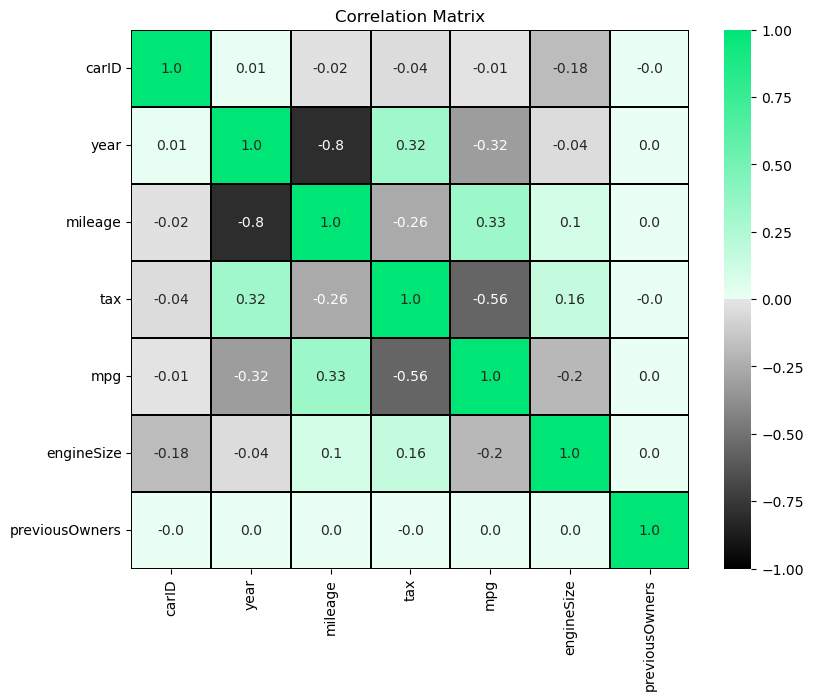

In [127]:
plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr_spearman,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

In [128]:
corr_pearson = df_train_new[num_cols].corr(method="pearson").round(2)
corr_pearson

,carID,year,mileage,tax,mpg,engineSize,previousOwners
carID,1.00,0.02,-0.04,-0.05,-0.00,-0.19,0.0
year,0.02,1.00,-0.71,0.19,-0.14,-0.04,0.0
mileage,-0.04,-0.71,1.00,-0.21,0.20,0.10,0.0
tax,-0.05,0.19,-0.21,1.00,-0.47,0.27,0.0
mpg,-0.00,-0.14,0.20,-0.47,1.00,-0.24,-0.0
engineSize,-0.19,-0.04,0.10,0.27,-0.24,1.00,0.0
previousOwners,0.00,0.00,0.00,0.00,-0.00,0.00,1.0


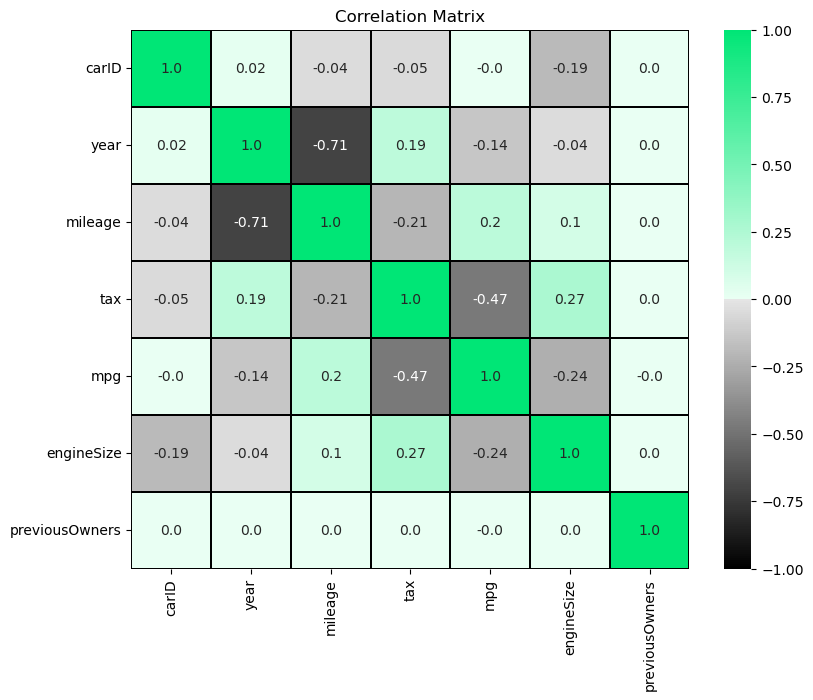

In [129]:
plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr_pearson,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

<h1 style="color: #00E676;">4. Predictive Modeling </h1>

In [130]:
target = "price"

df_model = df_train_new.copy() 

y = df_model[target]
X = df_model.drop(columns=["price", "carID"])  

In [131]:
numeric_features = [
    'year', 'mileage', 'tax', 'mpg',
    'engineSize', 'previousOwners'
]

categorical_features = [
    'Brand_clean', 'fuelType_clean',
    'transmission_clean', 'model_clean_fuzzy'
]

In [132]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Numeric:", numeric_features)
print("Categorical:", categorical_features)


X shape: (75971, 10)
y shape: (75971,)
Numeric: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']
Categorical: ['Brand_clean', 'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy']


In [133]:
def run_model(X, y, model_class=None, model_params=None, scaler=None):
    X_train = X.copy()
    imputers = {}


    imputers["year"] = fit_year_imputer(X_train)
    X_train = transform_year(X_train, imputers["year"])

    imputers["mileage"] = fit_mileage_imputer(X_train)
    X_train = transform_mileage(X_train, imputers["mileage"])

    imputers["tax"] = fit_tax_imputer(X_train)
    X_train = transform_tax(X_train, imputers["tax"])

    imputers["mpg"] = fit_mpg_imputer(X_train)
    X_train = transform_mpg(X_train, imputers["mpg"])

    imputers["engineSize"] = fit_engineSize_imputer(X_train)
    X_train = transform_engineSize(X_train, imputers["engineSize"])

    imputers["previousOwners"] = fit_previousOwners_imputer(X_train)
    X_train = transform_previousOwners(X_train, imputers["previousOwners"])

    imputers["cat"] = {}
    for col in categorical_features:
        imputers["cat"][col] = fit_categorical_imputer(X_train, col)
        X_train = transform_categorical(X_train, col, imputers["cat"][col])

    # 3. FEATURE ENGINEERING (SEM LEAKAGE)
    X_train = new_features(X_train)

    # One-hot encoding
    X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
    imputers["ohe_cols"] = X_train.columns.tolist()

    # Scaling opcional
    fitted_scaler = None
    if scaler is not None:
        fitted_scaler = scaler
        X_train = fitted_scaler.fit_transform(X_train)

    if model_params is None: model_params = {}
    model = model_class(**model_params)

    model.fit(X_train, y)
    X_train
    return model, imputers, fitted_scaler

In [134]:
def evaluate_model(X, y, model, imputers, scaler=None):
    X_eval = X.copy()

    X_eval = transform_year(X_eval, imputers["year"])
    X_eval = transform_mileage(X_eval, imputers["mileage"])
    X_eval = transform_tax(X_eval, imputers["tax"])
    X_eval = transform_mpg(X_eval, imputers["mpg"])
    X_eval = transform_engineSize(X_eval, imputers["engineSize"])
    X_eval = transform_previousOwners(X_eval, imputers["previousOwners"])

    for col in categorical_features:
        X_eval = transform_categorical(X_eval, col, imputers["cat"][col])
        
    # 3. FEATURE ENGINEERING
    X_eval = new_features(X_eval)

    # One-hot encoding
    X_eval = pd.get_dummies(X_eval, columns=categorical_features, drop_first=True)

    missing = set(imputers["ohe_cols"]) - set(X_eval.columns)
    for col in missing:
        X_eval[col] = 0

    X_eval = X_eval[imputers["ohe_cols"]]

    # Scaling
    if scaler is not None:
        X_eval = scaler.transform(X_eval)

    y_pred = model.predict(X_eval)
    return mean_absolute_error(y, y_pred)


In [135]:
def avg_score(method, X, y, model_class, model_params=None, scaler=None):
    train_scores = []
    val_scores = []

    for train_idx, val_idx in method.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model, imputers, fitted_scaler = run_model(
            X_train, y_train,
            model_class=model_class,
            model_params=model_params,
            scaler=scaler
        )

        mae_train = evaluate_model(X_train, y_train, model, imputers, fitted_scaler)
        mae_val = evaluate_model(X_val, y_val, model, imputers, fitted_scaler)

        train_scores.append(mae_train)
        val_scores.append(mae_val)

    print("Train MAE:", round(np.mean(train_scores), 4))
    print("Validation MAE:", round(np.mean(val_scores), 4))

    return train_scores, val_scores


In [136]:
def prepare_test_for_model(df_test_new, imputers, scaler=None):
    X_test = df_test_new.copy()
    
    # Aplicar os imputers numéricos
    X_test = transform_year(X_test, imputers["year"])
    X_test = transform_mileage(X_test, imputers["mileage"])
    X_test = transform_tax(X_test, imputers["tax"])
    X_test = transform_mpg(X_test, imputers["mpg"])
    X_test = transform_engineSize(X_test, imputers["engineSize"])
    X_test = transform_previousOwners(X_test, imputers["previousOwners"])
    
    # Imputação das categóricas
    for col, imp in imputers["cat"].items():
        X_test = transform_categorical(X_test, col, imp)
    
    # Novas features
    X_test = new_features(X_test)
    
    # One-hot encoding
    X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)
    
    # Garantir todas as colunas do treino
    missing = set(imputers["ohe_cols"]) - set(X_test.columns)
    for col in missing:
        X_test[col] = 0
    X_test = X_test[imputers["ohe_cols"]]
    
    # Escalamento, se aplicável
    if scaler is not None:
        X_test = scaler.transform(X_test)
    
    return X_test

<h3 style="color: #00E676;"> Random Forest </h3>

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "n_estimators": 300,
        "random_state": 42,
        "n_jobs": -1
    },
    scaler=None 
)

Train MAE: 507.2504
Validation MAE: 1368.5654


<h3 style="color: #00E676;"> Linear Regression </h3>

In [138]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr_train, lr_val = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},   # sem parâmetros
    scaler=None        # OLS funciona bem sem scaling
)

Train MAE: 2347.6971
Validation MAE: 2369.1752


<h3 style="color: #00E676;"> Decision Tree Regressor </h3>

In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None
)

Train MAE: 7.609
Validation MAE: 1759.2623


In [149]:
#COM HIPERPARAMETROS

In [140]:
#max_depth
best_depth = None
best_val_mae = float("inf")

for depth in range(1, 21):

    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=DecisionTreeRegressor,
        model_params={"random_state": 42, 
                      "max_depth": depth},
        scaler=None
    )

    val_mae = np.mean(val_scores)

    if val_mae < best_val_mae:
        best_val_mae = val_mae
        best_depth = depth

print("Best max_depth:", best_depth)
print("Validation MAE:", best_val_mae)

Train MAE: 5667.0476
Validation MAE: 5667.0742
Train MAE: 4698.9609
Validation MAE: 4699.6039
Train MAE: 4001.4297
Validation MAE: 4001.9149
Train MAE: 3465.2613
Validation MAE: 3470.8448
Train MAE: 3119.9044
Validation MAE: 3136.0237
Train MAE: 2851.6759
Validation MAE: 2892.6008
Train MAE: 2621.4895
Validation MAE: 2683.2712
Train MAE: 2396.8689
Validation MAE: 2484.4737
Train MAE: 2212.3133
Validation MAE: 2340.7768
Train MAE: 2034.2154
Validation MAE: 2193.9835
Train MAE: 1868.4368
Validation MAE: 2070.4251
Train MAE: 1715.2062
Validation MAE: 1985.9141
Train MAE: 1568.4068
Validation MAE: 1910.6463
Train MAE: 1427.8642
Validation MAE: 1852.074
Train MAE: 1294.017
Validation MAE: 1805.7479
Train MAE: 1169.2985
Validation MAE: 1770.0356
Train MAE: 1048.8847
Validation MAE: 1739.7394
Train MAE: 940.6498
Validation MAE: 1726.4614
Train MAE: 838.3318
Validation MAE: 1713.3061
Train MAE: 745.6414
Validation MAE: 1704.2931
Best max_depth: 20
Validation MAE: 1704.2930846824365


In [141]:
#min_samples_split
best_split = None
best_split_mae = float("inf")

split_values = [2, 10, 20, 50, 100, 200, 500]

for mss in split_values:

    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=DecisionTreeRegressor,
        model_params={"random_state": 42, 
                      "min_samples_split": mss},
        scaler=None
    )

    val_mae = np.mean(val_scores)

    if val_mae < best_split_mae:
        best_split_mae = val_mae
        best_split = mss

print("Best min_samples_split:", best_split)
print("Validation MAE:", best_split_mae)

Train MAE: 7.609
Validation MAE: 1759.2623
Train MAE: 747.3011
Validation MAE: 1650.0599
Train MAE: 1008.183
Validation MAE: 1611.376
Train MAE: 1296.193
Validation MAE: 1642.0721
Train MAE: 1517.3335
Validation MAE: 1733.9447
Train MAE: 1754.3034
Validation MAE: 1890.4749
Train MAE: 2096.45
Validation MAE: 2165.1743
Best min_samples_split: 20
Validation MAE: 1611.3759851666587


In [142]:
#min_samples_leaf
best_leaf = None
best_leaf_mae = float("inf")

leaf_values = [1, 5, 10, 20, 50, 100, 200]

for leaf in leaf_values:

    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=DecisionTreeRegressor,
        model_params={"random_state": 42, 
                      "min_samples_leaf": leaf},
        scaler=None
    )

    val_mae = np.mean(val_scores)

    if val_mae < best_leaf_mae:
        best_leaf_mae = val_mae
        best_leaf = leaf

print("Best min_samples_leaf:", best_leaf)
print("Validation MAE:", best_leaf_mae)

Train MAE: 7.609
Validation MAE: 1759.2623
Train MAE: 1111.9966
Validation MAE: 1713.2043
Train MAE: 1390.7227
Validation MAE: 1735.1576
Train MAE: 1625.8926
Validation MAE: 1820.8906
Train MAE: 1924.7299
Validation MAE: 2022.0961
Train MAE: 2175.8731
Validation MAE: 2233.6492
Train MAE: 2459.0631
Validation MAE: 2500.3899
Best min_samples_leaf: 5
Validation MAE: 1713.204341106423


In [143]:
#max_features
best_features = None
best_features_mae = float("inf")

feature_values = [None, "sqrt", "log2", 20, 50, 100]

for mf in feature_values:

    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=DecisionTreeRegressor,
        model_params={"random_state": 42, 
                      "max_features": mf},
        scaler=None
    )

    val_mae = np.mean(val_scores)

    if val_mae < best_features_mae:
        best_features_mae = val_mae
        best_features = mf

print("Best max_features:", best_features)
print("Validation MAE:", best_features_mae)

Train MAE: 7.609
Validation MAE: 1759.2623
Train MAE: 7.7403
Validation MAE: 2025.7995
Train MAE: 7.6478
Validation MAE: 2066.5951
Train MAE: 7.7529
Validation MAE: 1967.9326
Train MAE: 7.663
Validation MAE: 1877.8824
Train MAE: 7.6536
Validation MAE: 1794.9035
Best max_features: None
Validation MAE: 1759.2622938560714


In [144]:
final_model, final_imputers, final_scaler = run_model(
    X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42,
        "max_depth": 20,
        "min_samples_split": 20,
        "min_samples_leaf": 5,
        "max_features": None
    },
    scaler=None
)

final_mae = evaluate_model(X, y, final_model, final_imputers, final_scaler)
print("Model MAE with Hyperparameters:", final_mae)


Model MAE with Hyperparameters: 1328.9893602543289


<h3 style="color: #00E676;"> Knn Regressor </h3>

In [145]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler()  # MUITO IMPORTANTE
)

Train MAE: 1321.4504
Validation MAE: 1651.7629


In [146]:
#COM HIPERPARAMETROS

In [147]:
k_values = [1, 3, 5, 7, 9, 11, 15, 20, 25, 30]

best_k = None
best_val = float("inf")

for k in k_values:

    knn_train, knn_val = avg_score(
        kf, X, y,
        model_class=KNeighborsRegressor,
        model_params={"n_neighbors": k},
        scaler=StandardScaler()  
    )

    val_mae = np.mean(knn_val)

    if val_mae < best_val:
        best_val = val_mae
        best_k = k

print("Best K:", best_k)
print("Best Validation MAE:", best_val)


Train MAE: 8.0594
Validation MAE: 1870.6206
Train MAE: 1142.0525
Validation MAE: 1668.5148
Train MAE: 1321.4504
Validation MAE: 1651.7629
Train MAE: 1420.4393
Validation MAE: 1666.0511
Train MAE: 1488.2136
Validation MAE: 1684.5305
Train MAE: 1541.9456
Validation MAE: 1706.6844
Train MAE: 1627.2385
Validation MAE: 1754.4182
Train MAE: 1711.3632
Validation MAE: 1809.9462
Train MAE: 1780.1943
Validation MAE: 1865.3666
Train MAE: 1836.5186
Validation MAE: 1911.3429
Best K: 5
Best Validation MAE: 1651.7629211343751


In [148]:
final_knn, final_knn_imputers, final_knn_scaler = run_model(
    X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": best_k},
    scaler=StandardScaler()
)

final_knn_mae = evaluate_model(
    X, y,
    final_knn,
    final_knn_imputers,
    final_knn_scaler
)

print("Model KNN With Hyperparameters::", final_knn_mae)

Model KNN With Hyperparameters:: 1290.431404088402


<h3 style="color: #00E676;"> SVR </h3>

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
para dar erro
kf = KFold(n_splits=5, shuffle=True, random_state=42)

svm_train, svm_val = avg_score(
    kf, X, y,
    model_class=SVR,
    model_params={
        "kernel": "rbf",   # melhor default para regressão
        "C": 1.0,
        "epsilon": 0.2
    },
    scaler=StandardScaler()   # OBRIGATÓRIO para SVM
)


Train MAE: 6314.9695
Validation MAE: 6315.2364

SVM Resultados:
Train MAE médio: 6314.969538241055
Val   MAE médio: 6315.236359077653


Atençaõ, demora entre 2 a 3 a correr e os resultados são terriveis

In [273]:
df_test_new

,carID,year,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
0,89856,NaN,30700.0,205.0,41.5,1.6,3.0,Hyundai,petrol,automatic,i30
1,106581,2017.0,NaN,150.0,38.2,2.0,2.0,Vw,petrol,semi-auto,tiguan
2,80886,2016.0,36792.0,125.0,51.4,1.5,2.0,Bmw,petrol,automatic,2 series
3,100174,2019.0,5533.0,145.0,44.1,1.2,1.0,Opel,petrol,manual,grandland x
4,81376,2019.0,9058.0,150.0,51.4,2.0,4.0,Bmw,diesel,semi-auto,1 series
...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,2017.0,27575.0,145.0,46.3,1.4,1.0,Vw,petrol,manual,tiguan
32563,81363,2020.0,1980.0,145.0,34.0,2.0,3.0,Bmw,petrol,automatic,x2
32564,76833,2019.0,8297.0,145.0,38.2,2.0,4.0,Audi,diesel,semi-auto,q5
32565,91768,2019.0,NaN,145.0,28.5,1.3,1.0,Mercedes,petrol,manual,a class


### Kaggle Submission

In [274]:
final_model, imputers, fitted_scaler = run_model(
    X, y,
    model_class=RandomForestRegressor,
    model_params={
        "n_estimators": 300,
        "random_state": 42,
        "n_jobs": -1
    },
    scaler=None
)

#final_model.predict(df_test_new)

In [151]:
final_model, imputers, fitted_scaler = run_model(
    X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": best_k},
    scaler=StandardScaler()
)

#final_model.predict(df_test_new)

final_knn_mae = evaluate_model(
    X, y,
    final_knn,
    final_knn_imputers,
    final_knn_scaler
)

print("Model KNN With Hyperparameters::", final_knn_mae)

Model KNN With Hyperparameters:: 1290.431404088402


In [152]:
test_final = prepare_test_for_model(df_test_new, imputers)

test_preds = final_model.predict(test_final)

submission = pd.DataFrame({
    "CarID": df_test_new["carID"],  
    "price": test_preds           
})
submission.to_csv("submission.csv", index=False)


c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
